<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_7_Basic_ML_algorithms_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Юнит 7. Основные алгоритмы машинного обучения. Часть II


## ML-5. Решающие деревья и случайный лес


### 5.2. Решающие деревья

#### Задание 5.2.3
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за ` 0.2, random_state = 17` для разбиения и дерева. Максимальную глубину дерева примите за **3**, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за **2**. Какое значение $\ F1-score $ вы получили? Округлите до трёх знаков после точки-разделителя.

In [ ]:
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'
df = pd.read_csv(path)
df.sample(5)

,Variance,Skewness,Curtosis,Entropy,Class
106,2.3136,10.66510,-3.52880,-4.76720,0
238,3.9994,0.90427,1.16930,1.68920,0
1112,-4.1429,2.77490,0.68261,-0.71984,1
866,-4.1409,3.46190,-0.47841,-3.88790,1
1178,-2.0754,1.27670,-0.64206,-1.26420,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

RND_SEED = 17

target = 'Class'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.2, random_state=RND_SEED)

clf_tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=3,
                                  max_features=2,
                                  random_state=RND_SEED)

clf_tree.fit(X_train, Y_train)

from sklearn.metrics import f1_score

Y_pred = clf_tree.predict(X_test)
print ('f1_score = ', round(f1_score (Y_test, Y_pred), 3))

f1_score =  0.866


#### Задание 5.2.4

Проклассифицируйте банкноту с вектором признаков `2.04378, -0.38422, 1.437292, 0.76421`. К какому классу она относится?

In [ ]:
banknote_sample = np.array([2.04378, -0.38422, 1.437292, 0.76421]).reshape(1, -1)
print ('Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]:',
       clf_tree.predict(banknote_sample)[0])

Предсказанный класс банкноты [2.04378, -0.38422, 1.437292, 0.76421]: 0


#### ПРИМЕР
===================================================

===================================================

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

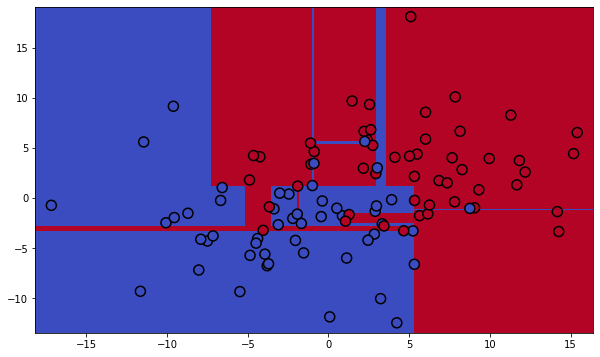

In [ ]:
plt.figure(figsize = (10, 6))
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

===================================================

===================================================

#### Задание 5.2.5

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за `0.3, random_state = 42` для разбиения и дерева. Вычислите ***RMSE***, округлите до двух знаков после точки-разделителя.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

path = 'https://lms.skillfactory.ru/assets/courseware/v1/fc8c2fb45f3b0b86d8fe409ff0f430af/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/petrol_consumption.csv'
df = pd.read_csv(path)

df.sample(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
17,7.0,3718,4725,0.540,714
45,9.0,4476,3942,0.571,510
4,8.0,4399,431,0.544,410
27,7.5,3846,9061,0.579,631
30,7.0,3640,6905,0.518,571


In [ ]:
RND_SEED = 42

target = 'Petrol_Consumption'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.3, random_state=RND_SEED)

tree_regr = DecisionTreeRegressor(random_state=RND_SEED)

tree_regr.fit(X_train, Y_train)
Y_pred = tree_regr.predict(X_test)

RMSE = np.sqrt(1 / Y_test.shape[0] * (Y_pred - Y_test) @ (Y_pred - Y_test))
TD = tree_regr.get_depth()

print('RMSE = ', round(RMSE, 2),
      '\nTree depth = ', TD)

RMSE =  87.97 
Tree depth =  11


#### Задание 5.4.1

На рисунке представлено решающее дерево «Ситуации из жизни» с признаками «количество доступных денег» и «количество времени до важного события».
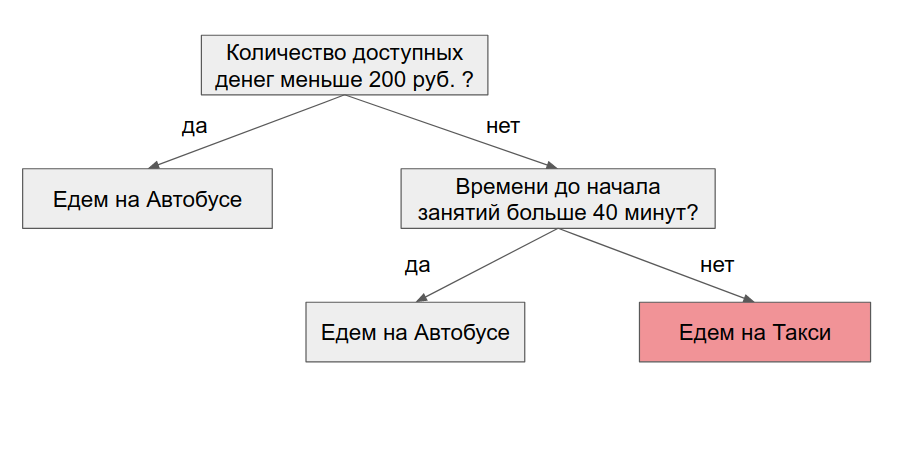
усть дана следующая выборка из пяти объектов (первый признак — деньги, второй — время):

[250, 45]

[100, 35]

[400, 30]

[250, 60]

[300, 50]

Сколько из них попадёт в красный лист?

In [ ]:
class DecisionTree():
    def __init__(self, time, money):
        # self.root = 
        pass
    def create_split(self, node):
        pass

v = np.array([
              [250, 45],
              [100, 35],
              [400, 30],
              [250, 60],
              [300, 50]              
])
v = v[v[:, 0]>200]
v[v[:, 1]<40].shape[0]

1

#### Задание 5.4.2
3\. Пусть решается задача классификации с помощью решающего дерева. Ниже приведены разные варианты распределения классов в какой-то произвольной вершине ([c1, c2, c3] означает, что в вершине c1 объектов первого класса, c2 объектов второго класса и c3 объектов третьего класса).

Какой из них должен получить меньшее значение критерия информативности?

[35, 45, 20],
[95, 3, 2],
[33, 34, 33]

In [ ]:
import numpy as np

def entropy_information_criterion(vector):

    vector = np.array(vector)
    prob = vector / np.sum(vector)

    return - prob @ np.log2(prob)

# 
def gini_information_criterion(vector):

    vector = np.array(vector)
    p = vector / np.sum(vector)

    return p @ (1 - p)

# все три варианта в виде строк матрицы
entry = np.array([
                  [35, 45, 20],
                  [95, 3,   2],
                  [33, 34, 33]
])

n_min = np.argmin([entropy_information_criterion(row) for row in entry])
print ('Minimum entropy is for', entry[n_min])

n_min = np.argmin([gini_information_criterion(row) for row in entry])
print ('Minimum gini criterion is for', entry[n_min])

Minimum entropy is for [95  3  2]
Minimum gini criterion is for [95  3  2]


#### Задание 5.5.2
Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее `6`.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами `test_size=0.30`, `random_state=42`.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (`random_state=42`, максимальная глубина равна `10`).

Введите значение $\ F1-score $ для классификатора, который показал наилучшее значение.

In [ ]:
import pandas as pd
import numpy as np

path = 'https://lms.skillfactory.ru/assets/courseware/v1/2daeecee174368f8a33b82c8cccae3a5/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/winequality-red.csv'
df = pd.read_csv(path, delimiter=';')
df.sample(5)

df['quality'] = df.quality // 6 #(df.quality >= 6).astype('int32')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

RND_SEED = 42

target = 'quality'
X = df.drop(target, axis=1).values
Y = df[target].values

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, test_size= 0.3, random_state=RND_SEED)

log_regr = LogisticRegression(random_state=RND_SEED)
log_regr.fit(X_train, Y_train)
Y_pred_log = log_regr.predict(X_test)

tree = DecisionTreeClassifier(criterion='gini',
                                  max_depth=10,
                                  random_state=RND_SEED)
tree.fit(X_train, Y_train)
Y_pred_tree = tree.predict(X_test)

round(np.max([f1_score(Y_test, Y_pred_tree),
          f1_score(Y_test, Y_pred_log)]),
         3
      )


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.793

Обучите модель с использование бэггинга (функция `BaggingClassifier` с `random_state=42`, разделение выборки на обучающую и тренировочную с параметрами `test_size=0.30, random_state=42`) для алгоритма, показавшего лучшее качество, определите количество моделей **1500**. Вычислите новое значение $\ F1-score $.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagger = BaggingClassifier(random_state=RND_SEED,
                           base_estimator=DecisionTreeClassifier(random_state=RND_SEED),
                           n_estimators=1500
                           )

bagger.fit(X_train, Y_train)

Y_pred_bag = bagger.predict(X_test)

print ('Bagging classifier F1-score:',
      round(f1_score(Y_test, Y_pred_bag), 3)
)

Bagging classifier F1-score: 0.816


### 5.6. Случайный лес
Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Откроем его, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

path = 'https://lms.skillfactory.ru/assets/courseware/v1/ecd07340ed6b98d6fb556b3429156eb4/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/temps_extended.csv'
weather = pd.read_csv(path)

RND_SEED = 42

X = weather.drop(['actual','weekday','month','day','year'], axis =1)
y = weather['actual']

X_train, X_val, Y_train, Y_val = \
    train_test_split(X, y, test_size=0.3, random_state=RND_SEED)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [ ]:
rf = RandomForestRegressor(random_state=RND_SEED)

# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

* n_estimators 
* max_features 
* max_depth 
* min_samples_split 
* min_samples_leaf
* bootstrap

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Обучим наш лес:
rf = RandomForestRegressor(random_state=RND_SEED)
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid,
                               n_iter=100, 
                               cv=3,
                               verbose=2,
                               random_state=RND_SEED,
                               n_jobs=-1)
rf_random.fit(X_train, Y_train)

# Посмотрим, какие гиперпараметры нам предлагают как оптимальные:

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

#### Задание 5.6.1

Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте `random_state = 42`. Какое улучшение **MSE** дала подстановка отобранных гиперпараметров? Ответ округлите до одного знака после запятой.


In [ ]:
N_val = Y_val.shape[0]

rf_default = RandomForestRegressor(random_state=RND_SEED)
rf_default.fit(X_train, Y_train)

y_pred_default = rf_default.predict(X_val)
MSE_default = 1 / N_val * (Y_val - y_pred_default) @ (Y_val - y_pred_default)

print ('MSE_default = ', round(MSE_default, 1))

rf_opt = RandomForestRegressor(
  bootstrap=True,
  max_depth=10,
  max_features='sqrt',
  min_samples_leaf=2,
  min_samples_split=5,
  n_estimators=1000,
  random_state=RND_SEED
)
rf_opt.fit(X_train, Y_train)

y_pred_opt = rf_opt.predict(X_val)
MSE_opt = 1 / N_val * (Y_val - y_pred_opt) @ (Y_val - y_pred_opt)

print ('MSE_opt = ', round(MSE_opt, 1))
print ('MSE_default - MSE_opt = ', round(MSE_default - MSE_opt, 1))

MSE_default =  24.6
MSE_opt =  23.1
MSE_default - MSE_opt =  1.5


### 5.7. Практика

Разберёмся с ансамблями алгоритмов и со случайным лесом. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

Сделаем базовую предобработку данных: удалим признак, который отвечает за идентификатор пользователя, как нерепрезентативный признак.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

path = "https://lms.skillfactory.ru/assets/courseware/v1/8dd3362700988d469792f2aa7a5fdcc4/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/HR-dataset.csv"
df = pd.read_csv(path)

display(df.sample(5))
np.random.seed(42)
RND_SEED=42
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print('Признаки:', features)

X, y = df[features].copy(), df[target]

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
10269,11270,0.66,0.99,3,228,2,0,0,0,technical,low
6070,7071,0.78,0.47,4,129,2,0,0,0,technical,medium
8950,9951,0.53,0.63,5,159,4,0,0,0,sales,low
12270,13271,0.44,0.51,2,127,3,0,1,0,technical,medium
11177,12178,0.85,0.81,4,260,3,0,0,0,product_mng,medium


Признаки: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. Масштабируем признаки для последующего сравнения результатов:

In [ ]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

# метод get использует текущее значение в методе apply в качестве ключа для аргумента apply
X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [ ]:
# В дальнейшем будем оценивать качество модели на кросс-валидации
# на пяти фолдах при помощи точности (accuracy).

def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

# Посмотрим на точность одного дерева:
tree = DecisionTreeClassifier(max_depth=30,
                              random_state=RND_SEED)
print("Decision tree mean accuracy:", estimate_accuracy(tree, X, y))

# Проведём бэггинг: для этого достаточно обернуть исходный классификатор в BaggingClassifier.
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging mean accuracy:", estimate_accuracy(bagging_trees, X, y))

Decision tree mean accuracy: 0.9746646659997777
Decision tree bagging mean accuracy: 0.9877994664888297


Именно так внутри и работает так называемый **случайный лес** (*Random Forest*): он обучает набор деревьев (параметр *n_esimators*), каждое из которых обучается на подмножестве признаков (*Random Subspaces*) и на подмножестве объектов (*bootstrap*). То есть случайный лес получается случайным по двум этим параметрам, а ответы агрегируются при помощи голосования.

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9917329331999556


Ещё одно преимущество использования бэггинга для агрегации моделей — получение **оценки** работы классификатора без дополнительного проведения **кросс-валидации** при помощи **out-of-bag score**. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр `oob_score = True`, что имеет смысл при достаточном количестве деревьев.

In [ ]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9932662177478498

In [ ]:
# на вход в качестве Х подается только 2 любых признака
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

# plot_predictions(X, y, random_forest)

#### Задание 5.7.1

1. Загрузите датасет **digits** с помощью функции *load_digits* из **sklearn.datasets** и подготовьте матрицу признаков ***X*** и ответы на обучающей выборке ***y*** (вам потребуются поля *data* и *target* в объекте, который возвращает *load_digits*). 

2. Информацию о датасете вы можете получить, обратившись к полю *DESCR* у возвращаемого объекта *load_digits*. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

3. Для оценки качества мы будем использовать **cross_val_score** из **sklearn.model_selection** с параметром $\ cv=10 $. Эта функция реализует *k-fold cross validation* c $\ k $ равным значению параметра $\ cv $. Предлагается использовать $\ k = 10 $, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и $\ k = 5 $. Функция *cross_val_score* будет возвращать *numpy.ndarray*, в котором будет $\ k $ чисел — качество в каждом из $\ k $ экспериментов *k-fold cross validation*. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод **.mean()** у массива, который возвращает *cross_val_score*.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление *cross_val_score*, следует попробовать использовать параметр **n_jobs**. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать `n_jobs = -1`, тогда будет задействовано максимальное число потоков.

========================
==
1\. Создайте `DecisionTreeClassifier` с настройками по умолчанию и измерьте качество его работы с помощью `cross_val_score`. Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).


In [ ]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

RND_SEED = 42

digits = load_digits()
X, y  = digits['data'], digits['target']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RND_SEED)
CVS_tree = cross_val_score(
    tree, X, y,
    cv=10,
    n_jobs=-1,
)
print (f'Cross validation score:\n{CVS_tree.mean()}')


Cross validation score:
0.8335909373060211


2\. Теперь давайте обучим `BaggingClassifier` на основе `DecisionTreeClassifier`. Из` sklearn.ensemble` импортируйте `BaggingClassifier`, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным **100**.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagger = BaggingClassifier(
    base_estimator=tree,
    n_estimators=100,
    random_state=RND_SEED
)

CVS_bagging = cross_val_score(
    bagger, X, y,
    cv=10,
    n_jobs=-1,
)

print (f'Cross validation score:\n{CVS_bagging.mean()}')

Cross validation score:
0.9270732464307884


3\. Теперь изучите параметры `BaggingClassifier` и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех  признаках, а на $\ \sqrt{d} $ случайных признаках.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три, $\log{d} $  тоже имеет место. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [ ]:
tree = DecisionTreeClassifier(random_state=RND_SEED)

bagger_reduced = BaggingClassifier(
    base_estimator=tree,
    max_features=int((X.shape[1])**0.5),
    n_estimators=100,
    # bootstrap=True,
    random_state=RND_SEED
)

CVS_bagging_reduced = cross_val_score(
    bagger_reduced, X, y,
    cv=10,
    n_jobs=-1
)

print (f'Cross validation score:\n{CVS_bagging_reduced.mean()}')

Cross validation score:
0.9298851644941031


4\. В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подмножество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из `BaggingClassifier` в `DecisionTreeClassifier`. Для этого вам из документации нужно выяснить, какой параметр `DecisionTreeClassifier` за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).
По-прежнему сэмплируем $\ \sqrt{d} $ признаков.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(
    max_features='sqrt',
    random_state=RND_SEED,
)

bagger_upd = BaggingClassifier(
    base_estimator=tree_clf,
    n_estimators=100,
    # bootstrap=True,
    random_state=RND_SEED
)

CVS_bagging_upd = cross_val_score(
    bagger_upd, X, y,
    cv=10,
    n_jobs=-1
)

print (f'Cross validation score:\n{CVS_bagging_upd.mean()}')

Cross validation score:
0.9549224084419615


#### Задание 5.7.2

Полученный в задании 4 классификатор — бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с `RandomForestClassifier` из sklearn.ensemble?

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y  = digits['data'], digits['target']

In [ ]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

RND_SEED = 42

# BaggingOverRandomTreesClassifier
def BORTClassifier(X, y,
                   N_TREES=100, 
                   CV=5, 
                   MAX_FEATURES='sqrt',
                   MAX_DEPTH=None,
                   RANDOM_STATE=42):

    tree_clf = DecisionTreeClassifier(
        max_features=MAX_FEATURES,
        max_depth=MAX_DEPTH,
        random_state=RANDOM_STATE,
    )

    bag_clf = BaggingClassifier(
        base_estimator=tree_clf,
        n_estimators=N_TREES,
        bootstrap=True,
        random_state=RANDOM_STATE
    )

    return cross_val_score(estimator=bag_clf, X=X, y=y, scoring='accuracy', cv=CV, n_jobs=-1)

Сравнение бэггинга над рандомизированными деревьями и "нативного" `RandomForestClassifier` из `sklearn`

In [ ]:
rnd_forest_clf = RandomForestClassifier(random_state=RND_SEED)
CVS_rnd_forest_clf = cross_val_score(
    rnd_forest_clf, X, y,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

print (f'Random forest default cross validation score:\n{CVS_rnd_forest_clf.mean()}')
print (f'BORT default cross validation score:\n\
{BORTClassifier(X, y, CV=10, RANDOM_STATE=RND_SEED).mean()}')

Random forest default cross validation score:
0.9493544382371197
BORT default cross validation score:
0.9549224084419615


In [ ]:
# plot_predictions(X[:, 6:8], y, rnd_forest_clf)             

Зависимость качества классификации случайного леса от числа деревьев 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num_of_trees = np.linspace(start=5, stop=205, num=40).astype('int32')
CVS_n_trees = np.array(
    [BORTClassifier(X, y, CV=5, N_TREES = n, RANDOM_STATE=RND_SEED).mean() for
        n in num_of_trees]
)

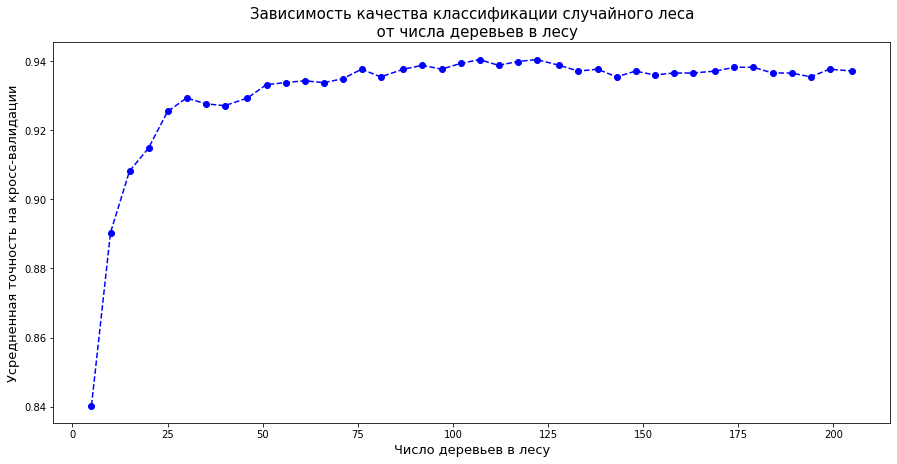

In [ ]:
plt.figure(figsize=(15,7));
plt.plot(num_of_trees, CVS_n_trees, 'bo', linestyle='--');
plt.title('Зависимость качества классификации случайного леса\n \
 от числа деревьев в лесу', fontsize=15)
plt.ylabel('Усредненная точность на кросс-валидации', fontsize=13)
plt.xlabel('Число деревьев в лесу', fontsize=13)
plt.show();

Зависимость качества классификации случайного леса от числа деревьев 

In [ ]:
n_of_features = np.linspace(1, X.shape[1]*0.66, 20).astype('int32')
CVS_n_features = np.array(
    [BORTClassifier(X, y, CV=5,
                    N_TREES=100,
                    MAX_FEATURES=n,
                    RANDOM_STATE=RND_SEED).mean() for n in n_of_features
     ]
)

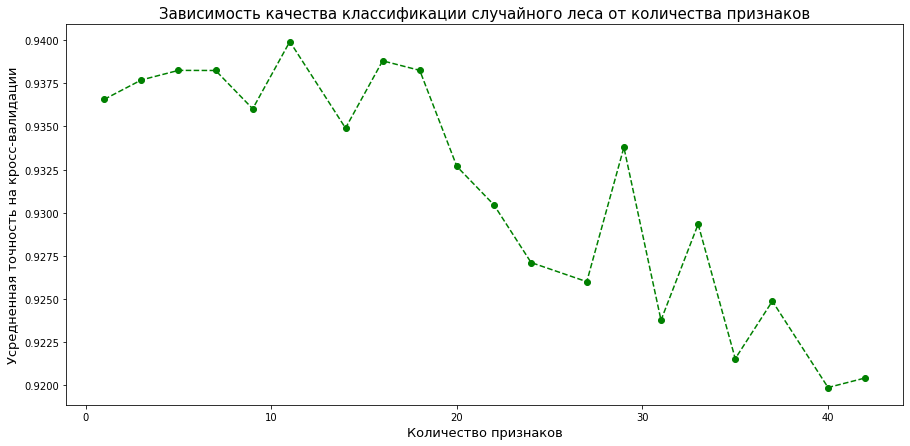

In [ ]:
plt.figure(figsize=(15,7));
plt.plot(n_of_features, CVS_n_features, 'go', linestyle='--');
plt.title('Зависимость качества классификации случайного леса от количества признаков',
          fontsize=15)
plt.ylabel('Усредненная точность на кросс-валидации', fontsize=13)
plt.xlabel('Количество признаков', fontsize=13)
plt.show();

In [ ]:
# import pandas as pd

# rf = RandomForestClassifier(random_state=42)
# rf.fit(X, y)
# pd.Series([clf.tree_.max_depth for clf in rf.estimators_]).hist()

Зависимость качества классификации случайного леса 
от ограничения на максимальную глубину деревьев

In [ ]:
max_tree_depth = np.linspace(2, 25, 23).astype('int32')
CVS_max_tree_depth = np.array(
    [BORTClassifier(X, y, CV=5,
                    N_TREES=100,
                    MAX_DEPTH=n,
                    RANDOM_STATE=RND_SEED).mean() for n in max_tree_depth
     ]
)

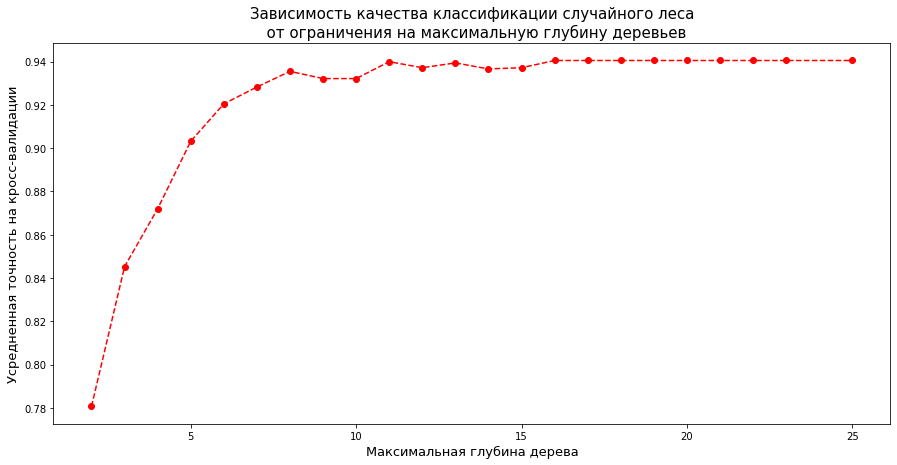

In [ ]:
plt.figure(figsize=(15,7));
plt.plot(max_tree_depth, CVS_max_tree_depth, 'ro', linestyle='--');
plt.title('Зависимость качества классификации случайного леса\n \
 от ограничения на максимальную глубину деревьев', fontsize=15)
plt.ylabel('Усредненная точность на кросс-валидации', fontsize=13)
plt.xlabel('Максимальная глубина дерева', fontsize=13)
plt.show();

 ## ML-6. Бустинг. Стекинг Machine Learning

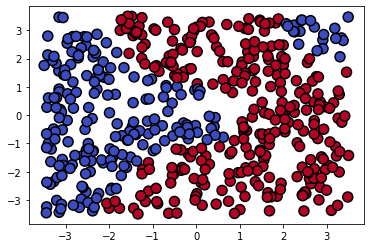

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def get_labels(data):
#     labels = []
#     for idx, item in enumerate(data):
#         if item[0]**3 + item[1]**2 < 1:
#             labels.append(0)
#         elif item[0] > 2 and item[1] > 2:
#             labels.append(0)
#         else:
#             labels.append(1)
#     return np.array(labels)

# m = 7 * np.random.random_sample((500,2)) - np.array([3.5, 3.5])
# labels = get_labels(m)

# plt.scatter(m[:, 0], m[:, 1], c=labels, s=100, 
#             cmap='coolwarm', edgecolors='black', linewidth=1.5);

### 6.4. Бустинг. Практика

#### Задание 6.4.1

Для решения первого задания урока сначала подготовим данные. Выкачаем набор данных, в котором будет прогнозировать, является ли письмо спамом.

Из столбца yesno сделайте столбец spam, где 1 соответствует значению y (является спамом), а 0 – n (не является спамом). Удалите первый столбец (с индексом) и столбец "yesno".

Комбинации признаков должны иметь вид "признак1_признак2".

У Вас остается шесть столбцов-признаков и один столбец spam, который является нашей целевой переменной. Разделим их на x и у.

Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations

RND_SEED = 42

df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')
df.sample()

df['spam'] = (df['yesno'] == 'y').astype('int32')
df = df.drop(['yesno', 'Unnamed: 0'], axis=1)

X, y = df.drop('spam', axis=1), df['spam']

#добавляем переменные взаимодействия признаков вида признак1 * признак2
for comb in combinations(X, 2):
    feature_name = comb[0] + '_' + comb[1]
    X[feature_name] = X[comb[0]] * X[comb[1]]

X.shape[1]

21

#### Задание 6.4.2

Разделим получившися данные на обучающую и тестовую выборки в соотношение 80:20. Обучите модель `GradientBoostingClassifier` (из библиотеки sklearn) с параметрами по умолчанию (на момент создания урока это `learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None`).

Во всех методах, где присутствует случайность, укажите `random_state=42`.

Это будет наш baseline. Укажите точность  на тестовой выборке (параметр score), округлив до третьего знака после точки-разделителя.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

RND_SEED = 42

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, y, test_size=0.2, random_state=RND_SEED)

gboost_clf = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=100,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)
gboost_clf.fit(X_train, Y_train)
# gboost_clf.train_score_[-1]
Y_pred = gboost_clf.predict(X_test)

print(f'Точность базового градиентного бустинга:\n\
{round(accuracy_score(Y_test, Y_pred), 3)}')

Точность базового градиентного бустинга:
0.865


Воспользуйтесь методом `feature_importances_`. С его помощью вы можете оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму, где по горизонтали указаны названия признаков, а по вертикали их важность. В ответе укажите третий по важности признак (без кавычек и пробелов).

'dollar_bang'

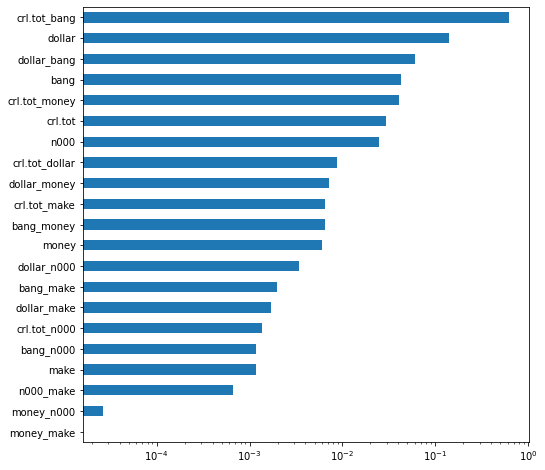

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

feat_importances = pd.Series(
    gboost_clf.feature_importances_,
    index=X.columns
).sort_values(ascending=True)

plt.figure(figsize=(8, 8));
feat_importances.plot(kind='barh', logx=True);

feat_importances.index[-3]

Теперь перейдем к подбору параметров в модели. Для этого в библиотеке `scikit-learn` есть метод `GridSearchCV`. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода `fit` модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становятся та, при которой значение метрики максимально.

Укажите в качестве `estimator` градиетный бустинг с параметрами по дефолту и `random_state=42`. В параметре scoring укажите `'accuracy', n_jobs=-1, cv=5`.

Сетку параметров задайте такой:

`param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],`  
              `'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}`

В ответе укажите точность, округленную до трёх знаков после точки разделителя, для лучших параметров на кросс-валидации. Для этого посмотрите в документации sklearn, какой атрибут GridSearchCV за это отвечает.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              'n_estimators':  [100, 250, 500, 750, 1000, 1250, 1500, 1750]
}

gboost_clf = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators=100,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)

grid_search = GridSearchCV(
    gboost_clf,
    param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)
grid_search.fit(X, y)

cv_score = grid_search.best_score_
print(f'Точность для лучших параметров на кросс-валидации:\n {round(cv_score, 3)}')

Точность для лучших параметров на кросс-валидации:
0.874155454845867


In [ ]:
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [ ]:
from sklearn.model_selection import cross_val_score

gboost_clf_best = GradientBoostingClassifier(learning_rate=0.01,
                                        n_estimators=1000,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)
cv_score_alt = cross_val_score(gboost_clf_best, X, y, scoring='accuracy', cv=5, n_jobs=-1).mean()
print(f'Точность для лучших параметров\n на кросс-валидации\
(альтернативное вычисление) :\n {round(cv_score_alt, 3)}')

Точность для лучших параметров
 на кросс-валидации(альтернативное вычисление) :
 0.874


#### Задание 6.4.3

Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. Например, менее глубокие деревья учатся быстрее, чем глубокие.

При использовании `GridSearchCV` перебираются все возможные способы комбинации параметров. Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) обучилось в прошлом задании?

In [ ]:
param_grid = {'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              'n_estimators':  [100, 250, 500, 750, 1000, 1250, 1500, 1750]
}

pg_ls = list(param_grid.values()) #['learning_rate']
np.prod([len(x) for x in pg_ls])

48

Теперь воспользуемся `GridSearchCV` для подбора максимальной глубины (`max_depth`). В качестве estimator используйте градиентный бустинг с раннеее подобранными параметрами и `random_state=42`. Переберите все значения `max_depth` от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [ ]:
gboost_clf_best = GradientBoostingClassifier(learning_rate=0.01,
                                        n_estimators=1000,
                                        max_depth=3,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        subsample=1,
                                        max_features=None,
                                        random_state=RND_SEED)

param_grid = {'max_depth': [i for i in range(5, 16)]}

grid_search_depth = GridSearchCV(
    gboost_clf_best, param_grid, scoring='accuracy', n_jobs=-1, cv=5
)
grid_search_depth.fit(X, y)

print(f"Лучшая точность достигается на max_depth = \
{grid_search_depth.best_params_['max_depth']}")

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=1000,
                                                  random_state=42,
                                                  subsample=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy')

#### Задание 6.4.4

Может показаться, что, научившись запускать готовые фукнции из библиотек и настраивать параметры, мы абсолютно готовы к работе. Однако на поле боя нас могут подстерегать еще опасности — legacy code, то есть код, написанный кем-то до вас. Может быть, его можно было бы и улучшить, но на нём уже столько всего надстроено, что переписывать всё практически невозможно.

А ещё часто будет возникать необходимость просто понять код коллеги или сделать code review (грубо говоря, это анализ кода на предмет ошибок и расхождения в стиле). Во всех этих ситуациях необходим навык быcтрого чтения кода.

Поэтому в качестве примера в этом задании мы предлагаем изучить код для реализации AdaBoost с нуля. Вам необходимо запустить эту функцию, но с дописанными строчками (вычисление ошибки и веса алгоритма) на всех признаках, получившихся после всех преобразований в предыдущем датасете (до разделения выборки на обучающую и тестовую). Параметр learning_rate возьмите равным 0.001, М = 10. В ответ запишите точность, округленную до трёх знаков после точки-разделителя.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

RND_SEED = 42

def AdaBoost_scratch(X, y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, \
    estimator_weight_list, sample_weight_list = [], [], [], [], []

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1,
                                           max_leaf_nodes=2,
                                           random_state=RND_SEED)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y).astype('int32')

        # Оцениваем ошибку
        estimator_error = np.sum(sample_weight * incorrect)
        
        # Вычисляем вес нового алгоритма
        estimator_weight = \
            learning_rate * np.log ((1 - estimator_error) / estimator_error)
        
        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect *\
               ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраняем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())

    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    acc = (preds == y).sum() / N
    # print('Accuracy = ', acc) 
    
    return acc, estimator_list, estimator_weight_list, sample_weight_list

accuracy, estimator_list, estimator_weight_list, sample_weight_list  = \
    AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

print('Точность алгоритма:', round(accuracy, 3) )

Точность алгоритма: 0.823


### 6.6. Стекинг. Практика

Функция `compute_meta_feature` принимает на вход один алгоритм и возвращает новые признаки на объектах, которые не использовались во время обучения. Функция `generate_meta_feature` делает подобное, но принимает на вход несколько классификаторов в списке и повторяет процедуру, а затем генерирует и возвращает матрицу с изначальным количеством объектов, признаков будет столько, сколько мы передали классификаторов. 

#### Задание 6.6.1

В скринкасте мы разобрали схему генерации признаков в стекинге, когда для тестовой выборки алгоритм заново обучался на всей тренировочной выборке. Реализуйте схему, когда вместо этого производится агрегация ответов всех обученных на фолдах классификаторов на тестовой выборке при помощи усреднения.

Логика решения: <br>
1) Создадим `X_meta_test`, заполним его нулями (по аналогии с `X_meta_train`);<br>
2) Далее на каждом шаге, где мы обучаем `folded_clf.fit (X_fold_train, y_fold_train)` и его предсказания на `X_fold_predict` запихиваем в `X_meta_train[predict_fold_index]`, добавим ещё одну строку, где в `X_meta_test` будем добавлять предсказания вероятностей `folded_clf` на `X_test`. Их можно сразу складывать друг с другом или сохранить много массивов, тогда в конце их нужно будет все сложить, а потом делить на количество сплитов (количество массивов равно количеству сплитов в кросс-валидации);<br>
3) После цикла останется только усреднить все эти массивы — это и будет наш `X_meta_test`.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import (f1_score, accuracy_score)
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

from matplotlib import pyplot as plt
%matplotlib inline

RND_SEED = 42

In [ ]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=RND_SEED, test_size=0.2)

За основу нужно взять следующий код:

In [ ]:
def compute_meta_feature_mean_(clf, X_train, X_test, y_train, cv):

    """    Эта функция подсчитывает признаки для мета-классификатора.
    Они являются вероятностями классов при решении задачи многоклассовой классификации.
        :arg clf: классификатор
        :args X_train, y_train: обучающая выборка
        :arg X_test: признаки тестовой выборки
        :arg cv: класс, генерирующий фолды (KFold)
        :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок    """

    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)

    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)

    X_meta_test = meta_clf.predict_proba(X_test)


    return X_meta_train, X_meta_test

In [ ]:
def compute_meta_feature_mean(clf, X_train, X_test, y_train, cv):
    """
    Эта функция подсчитывает признаки для мета-классификатора. 
    Они являются вероятностями классов при решении задачи многоклассовой классификации.

    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)

    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    # Напишите ваш код ниже
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)

    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = \
            X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_test += meta_clf.predict_proba(X_test)

    X_meta_test /= len(list(cv.split(X_train)))

    return X_meta_train, X_meta_test


#### Задание 6.6.2


##### 1)
Используйте функцию `generate_meta_features` для стекинга следующих алгоритмов:
- логистическая регрессия с L1-регуляризацией, `C=0.001`, `solver='saga'`, схема работы мультиклассовой классификации — `ovr`(one-vs-rest), максимальное допустимое количество итераций — `2000`;
- логистическая регрессия с L2-регуляризацией, `C=0.001`, `solver='saga'`, схема работы мультиклассовой классификации — `multinomial`, максимальное допустимое количество итераций — `2000`;
- случайный лес из 300 деревьев;
- градиентный бустинг из 200 деревьев.<br>

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — `'auto'` и solver — `'lbfgs'`.
Посчитайте качество при помощи передачи новых признаков в функцию `compute_metric`.

In [ ]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    if '.KFold' in str(type(cv)):
        splits = cv.split(X_train)
    elif '.StratifiedKFold' in str(type(cv)):
        splits = cv.split(X_train, y_train)
        
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

def compute_metric(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)

In [ ]:
classifiers = [
               LogisticRegression(penalty='l1', C=0.001, solver='saga',
                                  multi_class='ovr', max_iter=2000,
                                  random_state=RND_SEED),
               LogisticRegression(penalty='l2', C=0.001, solver='saga',
                                  multi_class='multinomial', max_iter=2000,
                                  random_state=RND_SEED),
               RandomForestClassifier(n_estimators=300, random_state=RND_SEED),
               GradientBoostingClassifier(n_estimators=200, random_state=RND_SEED)
]

cv = KFold(n_splits=10, shuffle=True, random_state=RND_SEED)

stacked_features_train, stacked_features_test =\
 generate_meta_features(classifiers, X_train, X_test, y_train, cv)

meta_clf = LogisticRegression(penalty='none', multi_class='auto', solver='lbfgs',
                              random_state=RND_SEED)

100%|██████████| 4/4 [03:57<00:00, 59.50s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf,
                     X_train=stacked_features_train,
                     y_train=y_train,
                     X_test=stacked_features_test,
                     y_test=y_test)
)


F1-score: 0.98098


##### 2)
Используйте функцию `generate_meta_features` для стекинга следующих алгоритмов:
- случайный лес из 300 деревьев
- случайный лес из 200 экстремальных деревьев<br>

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — `auto` и `solver='lbfgs'`.
Посчитайте качество при помощи передачи новых признаков в функцию `compute_metric`.

In [ ]:
classifiers_2 = [
               RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                      random_state=RND_SEED),
               ExtraTreesClassifier(n_estimators=200, n_jobs=-1,
                                    random_state=RND_SEED)
]

cv = KFold(n_splits=10, shuffle=True, random_state=RND_SEED)

stacked_features_train_2, stacked_features_test_2 =\
 generate_meta_features(classifiers, X_train, X_test, y_train, cv)

meta_clf_2 = LogisticRegression(penalty='none', multi_class='auto', solver='lbfgs',
                              random_state=RND_SEED)


100%|██████████| 4/4 [04:16<00:00, 64.05s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_2,
                     X_train=stacked_features_train_2,
                     y_train=y_train,
                     X_test=stacked_features_test_2,
                     y_test=y_test)
)


F1-score: 0.98098


##### 3)
Используйте функцию `generate_meta_features` для стекинга следующих алгоритмов:
- метод ближайших соседей (k-NN) со стандартными параметрами;
- случайный лес из 300 экстремальных деревьев;<br>

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — `auto` и `solver ='lbfgs'`.
Посчитайте качество при помощи передачи новых признаков в функцию `compute_metric`.

In [ ]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [ ]:
classifiers_3 = [
               KNeighborsClassifier(),
               ExtraTreesClassifier(n_estimators=300, n_jobs=-1,
                                    random_state=RND_SEED)
]

cv = KFold(n_splits=10, shuffle=True, random_state=RND_SEED)

stacked_features_train_3, stacked_features_test_3 =\
 generate_meta_features(classifiers_3, X_train_scaled, X_test_scaled, y_train, cv)

meta_clf_3 = LogisticRegression(penalty='none', multi_class='auto', solver='lbfgs',
                              random_state=RND_SEED)

100%|██████████| 2/2 [00:13<00:00,  6.82s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_3,
                     X_train=stacked_features_train_3,
                     y_train=y_train,
                     X_test=stacked_features_test_3,
                     y_test=y_test)
)


F1-score: 0.984615


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##### 4)
Используйте функцию `generate_meta_features` для стекинга следующих алгоритмов:
- логистическая регрессия с L1-регуляризацией, `C=0.001`, `solver='saga'`, схема работы мультиклассовой классификации — `'ovr'` (one-vs-rest), максимальное допустимоей количество итераций — `2000`;
- метод ближайших соседей со стандартными параметрами;
- случайный лес из 300 экстремальных деревьев;
- AdaBoost со стандартными параметрами.

Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — `auto` и `solver='lbfgs'`.
Посчитайте качество при помощи передачи новых признаков в функцию `compute_metric`.

In [ ]:
classifiers_4 = [
               LogisticRegression(penalty='l1', multi_class='ovr', C=0.001,
                                  solver='saga', max_iter=2000, random_state=RND_SEED),
               KNeighborsClassifier(),
               ExtraTreesClassifier(n_estimators=300, n_jobs=-1,
                                    random_state=RND_SEED),
               AdaBoostClassifier(random_state=RND_SEED)

]

cv = KFold(n_splits=10, shuffle=True, random_state=RND_SEED)

stacked_features_train_4, stacked_features_test_4 =\
 generate_meta_features(classifiers_4, X_train_scaled, X_test_scaled, y_train, cv)

meta_clf_4 = LogisticRegression(penalty='none', multi_class='auto', solver='lbfgs',
                              random_state=RND_SEED)

100%|██████████| 4/4 [00:26<00:00,  6.61s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_4,
                     X_train=stacked_features_train_4,
                     y_train=y_train,
                     X_test=stacked_features_test_4,
                     y_test=y_test)
)


F1-score: 0.984567


##### 5)
Используйте функцию `generate_meta_features` для стекинга следующих алгоритмов:
- случайный лес из 300 деревьев
- случайный лес из 300 экстремальных деревьев

Для генерации фолдов используйте класс `StratifiedKFold`, который позволяет делать так называемые стратифицированные разбиения (в каждом фолде будет одинаковое соотношение классов).
Для корректной работы необходимо подправить код в функции `compute_meta_feature`.<br>
Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — `auto` и солвером `'lbfgs'`.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric. Количество фолдов = 10.

In [ ]:
classifiers_5 = [
               RandomForestClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1),
               ExtraTreesClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1)
]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND_SEED)

stacked_features_train_5, stacked_features_test_5 =\
 generate_meta_features(classifiers_5, X_train, X_test, y_train, cv)

meta_clf_5 = LogisticRegression(penalty='none', multi_class='auto', solver='lbfgs',
                              random_state=RND_SEED)






  0%|          | 0/4 [00:00<?, ?it/s]




 25%|██▌       | 1/4 [00:59<02:57, 59.05s/it]




  0%|          | 0/4 [01:33<?, ?it/s]





  0%|          | 0/4 [24:48<?, ?it/s]





100%|██████████| 4/4 [03:57<00:00, 59.50s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_5,
                     X_train=stacked_features_train_5,
                     y_train=y_train,
                     X_test=stacked_features_test_5,
                     y_test=y_test)
)


F1-score: 0.97591


In [ ]:
# прогресс-бар
# import time
# from tqdm import tqdm

# mylist = [1,2,3,4,5,6,7,8]

# for i in tqdm(mylist):
#     time.sleep(0.5)


In [ ]:
# # как работает KFold
# import numpy as np
# import pprint
# from sklearn.model_selection import KFold

# v = [x for x in range(1, 51)]
# v = np.asarray(v).reshape(5, 10).T
# cv = KFold(2).split(X=v)

# pp = pprint.PrettyPrinter(indent=4)
# print(v, '\n\n')

# i=1
# for train, test in cv:
#     print(f'TRAIN{i} = \n{v[train]}\n')
#     print(f'TEST{i} = \n{v[test]}\n======================\n======================\n')
#     i+=1


#### Задание 6.6.3

##### 1)
В предыдущей задаче измените 10 фолдов на 20. Укажите полученное качество.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import (f1_score, accuracy_score)
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

from matplotlib import pyplot as plt
%matplotlib inline

RND_SEED = 42

In [ ]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    if '.KFold' in str(type(cv)):
        splits = cv.split(X_train)
    elif '.StratifiedKFold' in str(type(cv)):
        splits = cv.split(X_train, y_train)
        
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

def compute_metric(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)

In [ ]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=RND_SEED, test_size=0.2)

In [ ]:
classifiers_1 = [
               RandomForestClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1),
               ExtraTreesClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1)
]

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=RND_SEED)

stacked_features_train_1, stacked_features_test_1 =\
 generate_meta_features(classifiers_1, X_train, X_test, y_train, cv)

meta_clf_1 = LogisticRegression(penalty='none', multi_class='auto', solver='lbfgs',
                              random_state=RND_SEED)

100%|██████████| 2/2 [01:10<00:00, 35.45s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_1,
                     X_train=stacked_features_train_1,
                     y_train=y_train,
                     X_test=stacked_features_test_1,
                     y_test=y_test)
)


F1-score: 0.984228


##### 2)
В предыдущей задаче укажите количество фолдов равным 5 и поменяйте мета-алгоритм на случайный лес со стандартными параметрами. Укажите полученное качество.

In [ ]:
classifiers_2 = [
               RandomForestClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1),
               ExtraTreesClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1)
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND_SEED)

stacked_features_train_2, stacked_features_test_2 =\
 generate_meta_features(classifiers_2, X_train, X_test, y_train, cv)

meta_clf_2 = RandomForestClassifier(random_state=RND_SEED, n_jobs=-1)

100%|██████████| 2/2 [00:15<00:00,  7.51s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_2,
                     X_train=stacked_features_train_2,
                     y_train=y_train,
                     X_test=stacked_features_test_2,
                     y_test=y_test)
)


F1-score: 0.981661


##### 3)
В предыдущей задаче поменяйте мета-алгоритм на метод ближайших соседей (k-NN) со стандартными параметрами. Укажите полученное качество.

In [ ]:
classifiers_3 = [
               RandomForestClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1),
               ExtraTreesClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1)
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND_SEED)

stacked_features_train_3, stacked_features_test_3 =\
 generate_meta_features(classifiers_3, X_train, X_test, y_train, cv)

meta_clf_3 = KNeighborsClassifier()

100%|██████████| 2/2 [00:15<00:00,  7.52s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_3,
                     X_train=stacked_features_train_3,
                     y_train=y_train,
                     X_test=stacked_features_test_3,
                     y_test=y_test)
)


F1-score: 0.98417


##### 4)
В предыдущей задаче поменяйте мета-алгоритм на градиентный бустинг со стандартными параметрами. Укажите полученное качество.

In [ ]:
classifiers_4 = [
               RandomForestClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1),
               ExtraTreesClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1)
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND_SEED)

stacked_features_train_4, stacked_features_test_4 =\
 generate_meta_features(classifiers_4, X_train, X_test, y_train, cv)

meta_clf_4 = GradientBoostingClassifier(random_state=RND_SEED)

100%|██████████| 2/2 [00:24<00:00, 12.06s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_4,
                     X_train=stacked_features_train_4,
                     y_train=y_train,
                     X_test=stacked_features_test_4,
                     y_test=y_test)
)


F1-score: 0.984925


##### 5)

Используйте функцию `generate_meta_features` для стекинга следующих алгоритмов:
- случайный лес из 300 деревьев, критерий Джини, максимальная глубина — 24
- случайный лес из 300 экстремальных деревьев

Для генерации фолдов используйте класс `StratifiedKFold`, который позволяет делать так называемые стратифицированные разбиения (в каждом фолде будет одинаковое соотношение классов).<br>
Для генерации фолдов используйте класс `StratifiedKFold` и поправленный Вами ранее код в функции `compute_meta_feature`. Выполните разбиение на 3 фолда.<br>
Как мета-алгортм используйте случайный лес из 100 экстремальных деревьев.<br>
Посчитайте качество при помощи передачи новых признаков в функцию `compute_metric`.

In [ ]:
classifiers_5 = [
               RandomForestClassifier(n_estimators=300, criterion='gini',
                                      random_state=RND_SEED, max_depth=24, n_jobs=-1),
               ExtraTreesClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1)
]

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RND_SEED)

stacked_features_train_5, stacked_features_test_5 =\
 generate_meta_features(classifiers_5, X_train, X_test, y_train, cv)

meta_clf_5 = ExtraTreesClassifier(random_state=RND_SEED)

100%|██████████| 2/2 [00:09<00:00,  4.72s/it]


In [ ]:
print('\nF1-score:',
      compute_metric(meta_clf_5,
                     X_train=stacked_features_train_5,
                     y_train=y_train,
                     X_test=stacked_features_test_5,
                     y_test=y_test)
)


F1-score: 0.986498


##### 6)
Обучите на тренировочной выборке следующие алгоритмы:
- случайный лес из 300 деревьев, критерий Джини, максимальная глубина — 24;
- случайный лес из 300 экстремальных деревьев;
- логистическую регрессию со стандартными параметрами;

Усредните их ответы на тестовой выборке методом сложения предсказаний и затем взятия функции `argmax: answer = (prediction1 + prediction2 + prediction3).argmax(axis = 1)`.<br>
Посчитайте качество, аналогично функции `compute_metric` (F1-score с макро-усреднением, округленный до 6 знака).

In [ ]:
def fit_clfs_and_predict(clf_list, X_train, y_train, X_test):
    predictions = []
    for clf in clf_list:
        clf.fit(X_train, y_train)
        predictions.append(clf.predict_proba(X_test))
    return predictions #.reshape(len(clf_list), X_test.shape[0])

In [ ]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [ ]:
classifiers_6 = [
               RandomForestClassifier(n_estimators=300, criterion='gini',
                                      random_state=RND_SEED, max_depth=24, n_jobs=-1),
               ExtraTreesClassifier(n_estimators=300, random_state=RND_SEED, n_jobs=-1),
               LogisticRegression(random_state=RND_SEED, n_jobs=-1)
]

predictions = fit_clfs_and_predict(classifiers_6, X_train, y_train, X_test)
# predictions.shape : (3, 360, 10) - 3 классификатора, 360 объектов тестовой выборки,
# 10 вероятностей для каждого класса

In [ ]:
# суммируем вероятности для каждого класса каждого классификатора,
# argmax дает класс соответствующий максимальной суммарной вероятности
answer = np.asarray(predictions).sum(axis=0).argmax(axis=1)

print('\nF1-score:', round(f1_score(y_test, answer, average='macro'), 6))



F1-score: 0.976259


In [ ]:
a = np.array([]) #.reshape[]
for i in range(3):
    a = np.append(a, np.array([1, 2]), 0)
a.reshape(3, 2)

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

 ## ML-7. Кластеризация
 Задача кластеризации: найти отображение множества входных объектов $\ X $, которое разделило бы множество $\ X $ на подгруппы. Кластеризация — это обучение без учителя.

Формальная запись задачи кластеризации выглядит следующим образом:

Пусть $\ X $ — множество объектов, $\ Y $  — множество метод кластеров (идентификаторов их принадлежности). На множестве  задана функция, которая вычисляет расстояние между объектами:$$\ \rho\left(x, x^{\prime}\right) $$

. 

Также дана конечная обучающая выборка объектов: $$\ X^{m}=\left\{x_{1}, \ldots, x_{m}\right\} \subset X $$
 

Нам надо разбить выборку на кластеры, то есть поставить каждому объекту $\ x_{i} \in X^{m} $ в соответствие метку $\ $ так, чтобы внутри каждого кластера объекты были как можно более близки (то есть расстояние должно быть минимальным), а объекты из разных кластеров значительно различались.

В задаче кластеризации входные данные задаются двумя способами:

Признаковое описание объектов: все объекты описываются некоторыми характеристиками (значениями признаков)
Матрица расстояний между объектами: для каждого объекта представлены расстояния от него до всех остальных объектов выборки
Некорректность задачи кластеризации — решение задачи кластеризации принципиально неоднозначно:

Нет точной постановки задачи кластеризации.
Существует множество критериев качества кластеризации.
Существует множество методов кластеризации.
Часто заранее неизвестно число кластеров.
Результат кластеризации зависит от метрики, которая задаётся субъективно.
Для чего нужны разные подходы кластеризации?

Разные цели кластеризации:
Упростить дальнейшую обработку данных: разбить множество объектов на несколько групп (кластеров), чтобы в дальнейшем работать с каждым кластером в отдельности
Сократить объём хранимых данных: выделить кластеры и оставить по одному объекту от каждого кластера и таким образом сжать данные
Выделить нетипичные объекты: выделить объекты, которые нельзя отнести ни к одному из кластеров
Построить иерархию множества объектов: задача таксономии.
Разнообразие условий задач кластеризации.
Подробнее про условия задач мы поговорим в следующем уроке.


### 7.3. Условия задач кластеризации
Форма кластеров: внутрикластерные расстояния меньше межкластерных, ленточная структура, кластеры с центром, кластеры соединены перемычками, разреженный фон, пересекающиеся кластеры, кластеры отсутствуют, кластеры образуются не по близости расстояний.

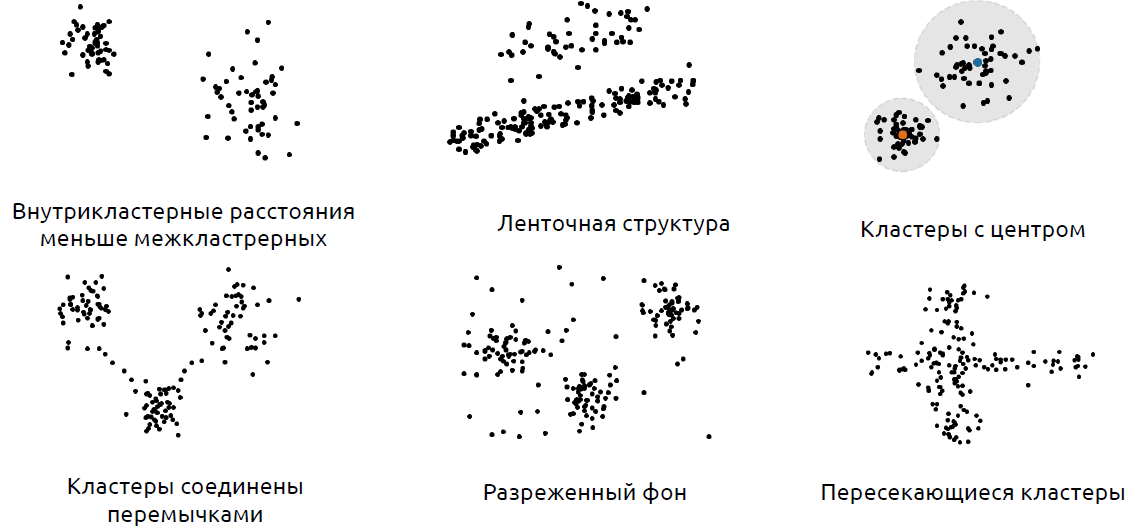

Вложенность кластеров друг в друга.
Размер кластеров: один кластер — одна тема, один кластер — одно большое событие, один кластер — одна новость.
Кластеризация как основная или вспомогательная задача.
Жёсткая (определяем конкретный кластер для объекта) или мягкая (определяем вероятность принадлежности объекта к кластеру) кластеризация.

### 7.4. Алгоритмы кластеризации


##### Задание 7.4.5

###### 3)
Предположим, вам необходимо провести кластеризацию на 7 точках. В ходе первой итерации точки расположились по кластерам следующим образом: С1: \{(2,2), (4,4), (6,6)} C2: \{(0,4), (4,0)} C3: \{(5,5), (9,9)} Какие координаты у центроидов будут на второй итерации?

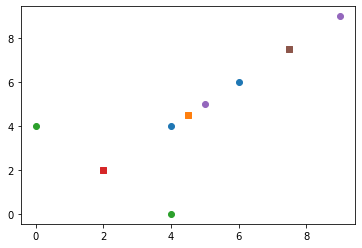

In [ ]:
import numpy as np

def dist(p1, p2):
    return np.sum([(p1[i] - p2[i])**2 for i in range(len(p1))])**0.5

def get_centroids(state, points):

    centroids = {}
    dim = len(points[0])
    x_c = np.zeros(dim)

    for key in list(state.keys()):
        for j in range(dim):
            x_c[j] = np.mean([point[j] for point in state[key]])
        
        centroids[key] = tuple(x_c)

    return centroids

def get_dist_dict(state, points):

    dist_dict = {point: {centr: dist(point, centroids[centr]) 
        for centr in sorted(list(centroids.keys()))}
            for point in points}

    return dist_dict

def get_new_state(state, dist_dict):

    ls = list(state.keys())    
    new_state = {centr: [] for centr in ls}

    for p in points:
        key = min(dist_dict[p], key=lambda k: dist_dict[p][k])
        new_state[key] = new_state[key] + [p]

    return new_state

init_state = {'С1': [(2,2), (4,4), (6,6)],'C2': [(0,4), (4,0)], 'C3': [(5,5), (9,9)]}
ls = list(init_state.keys())
points = [el2 for el1 in list(init_state.values()) for el2 in el1]

centroids = get_centroids(init_state, points)
dist_dict = get_dist_dict(init_state, points)
new_state = get_new_state(init_state, dist_dict)
new_centroids = get_centroids(new_state, points)

init_state, new_state, centroids, new_centroids

import matplotlib.pyplot as plt
%matplotlib inline

for cls in ls:
    plt.scatter([p[0] for p in init_state[cls]], [p[1] for p in init_state[cls]],
                marker = 'o')
    # plt.scatter(centroids[cls][0], centroids[cls][1], marker="s")
    plt.scatter(new_centroids[cls][0], new_centroids[cls][1], marker="s")

### 7.5. K-means. Практика
Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

**Визуализируем наш датасет:**

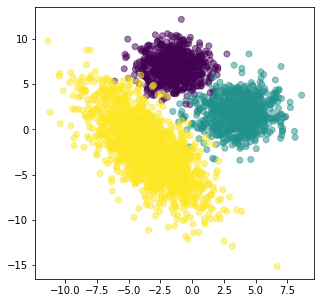

In [ ]:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()


Посмотрим распределение классов в датасете:

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
# {0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно. Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:<br>
`from sklearn.cluster import KMeans`<br>
`k_means = KMeans()`




При создании объекта можно указать следующие параметры:

 - n_clusters — число кластеров, на которое алгоритм будет делить набор данных;
 - init — способ начальной инициализации центроидов кластров;
 - random_state — фиксирует генерацию случайного числа для инициализации центроидов.
 
Полный список параметров доступен в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (англ.).

#### Задание 7.5.2
Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

`k_means.fit(X)`
Обучив, мы можем получить центроиды кластеров:

`k_means.cluster_centers_`
И узнать, в какой кластер попал каждый из объектов:

`k_means.labels_`

Обучите модель K-means с параметрами `n_clusters=3` и `random_state=42` на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией `numpy.round`

In [ ]:
from sklearn.cluster import KMeans
RND_SEED = 42

k_means = KMeans(n_clusters=3, random_state=RND_SEED)
k_means.fit(X)

centers = k_means.cluster_centers_
print(f"Clusters centers are:\n{np.round(centers).astype('int32')}")

Clusters centers are:
[[-3 -3]
 [-2  6]
 [ 4  2]]


#### Задание 7.5.3

Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`:

In [ ]:
n_unique = np.unique(k_means.labels_, return_counts=True)
print(n_unique[1])

[1320  938  742]


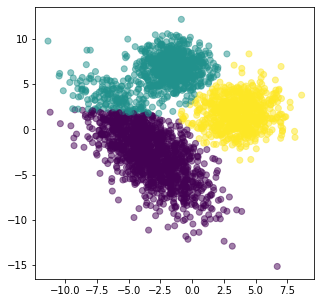

In [ ]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

Подгрузите данные и откройте их.

[СКАЧАТЬ ДАННЫЕ](https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/snsdata.csv)

В датасете для учеников предоставлены следующие признаки:

Год выпуска
Пол
Возраст
Количество друзей
36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи).
Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью `StandardScaler()`. Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, `random_state=123`.


#### Задание 7.5.4

##### 1)
Укажите номер кластера, в который попало меньше всего учеников.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

path = "https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/snsdata.csv"
df = pd.read_csv(path)

In [ ]:
df.sample(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
16434,2008,F,17.070,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,0,1,2,0,0,0,1,0,1,2
29364,2009,NaN,NaN,70,0,0,3,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,2,1,1,3,0,0,2,0,0,2,2,1,0,0,2,0,0,0
28194,2009,M,15.537,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7444,2006,F,18.902,11,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,2,1,3,0,2,0,0,0,1,0,0,0,0,0,0,0
7525,2007,F,17.457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
RND_SEED = 123

X = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1).copy()

scaler = StandardScaler()
scaler.fit_transform(X)

k_means = KMeans(n_clusters=9, random_state=RND_SEED)
k_means.fit(X)

KMeans(n_clusters=9, random_state=123)

In [ ]:
unique, counts = np.unique(k_means.labels_, return_counts=True)
n_min = unique[np.argmin(counts)] 
print(f'Номер кластера, в который попало меньше всего учеников: {n_min}')

Номер кластера, в который попало меньше всего учеников: 1


In [ ]:
np.unique(k_means.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([ 1041,     1,   724, 19110,   571,  1124,  6572,     2,   855]))

##### 2)
В один из кластеров попали ученики с интересами music, god, dance, hair, shopping, cute, band, rock, football, church. Сколько всего учеников попали в этот кластер?

In [ ]:
# k_means.feature_names_in_
interests = ['music', 'god', 'dance', 'hair',
             'shopping', 'cute', 'band',
             'rock', 'football', 'church'
]
se = np.ones(X.shape[0])
for feat in interests:
    se *= X[feat].values
X['aggr'] = se
X['clusters'] = k_means.labels_
n_interests =  X[X['aggr'] > 0][interests + ['clusters']].shape[0]
print (f'В кластер попало учеников: {n_interests}')

# X[X['aggr'] > 0][interests + ['clusters']]

В кластер попало учеников: 8


,music,god,dance,hair,shopping,cute,band,rock,football,church,clusters
888,22,3,2,10,1,2,6,5,1,1,0
9911,12,4,12,27,8,8,7,2,11,5,0
12580,6,5,1,5,1,1,1,1,1,1,0
13192,6,1,1,13,3,4,1,1,1,1,0
15015,4,5,2,21,1,3,2,5,2,2,0
24365,16,2,4,37,2,4,5,3,3,1,0
25882,3,2,1,7,1,1,3,1,1,1,0
29583,10,1,3,11,1,9,3,6,3,1,0


In [ ]:
# interests = ['music', 'god', 'dance', 'hair',
#              'shopping', 'cute', 'band',
#              'rock', 'football', 'church'
# ]

# X.groupby('clusters').sum()[interests]

### 7.6. EM-алгоритм. Практика

#### Задание 7.6.2

Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией `numpy.round`:

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
import pandas as pd
import numpy as np


n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
RND_SEED = 42

gm = GaussianMixture(n_components=3, random_state=RND_SEED)
gm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [ ]:
def sfize(ans_):
    ans = '['
    for arr in ans_:
        ans += '['
        for el in arr:
            ans += str(el) + ' '
        ans = ans[: -1] + '] '
    return ans[:-1] + ']'
    
ans_ = np.round(gm.means_).astype('int32')
sfize(ans_)

'[[4 2] [-2 7] [-4 -2]]'

#### Задание 7.6.3

Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`:

In [ ]:
y_pred = gm.predict(X)
u = np.unique(y_pred, return_counts=True)
'[' + sfize(u)[9:]

'[[744 763 1493]]'

#### Задание 7.6.4

Возьмите данные про учеников старшей школы из прошлого урока (c такой же обработкой) и примените к ним EM-алгоритм , количество кластеров — 9, `random_state = 123`. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

path = "https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/snsdata.csv"
df = pd.read_csv(path)

In [ ]:
RND_SEED = 123

X = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1).copy()

scaler = StandardScaler()
scaler.fit_transform(X)

gm = GaussianMixture(n_components=9, random_state=RND_SEED)
gm.fit(X)

GaussianMixture(n_components=9, random_state=123)

In [ ]:
y_pred = gm.predict(X)
y_pred[7], y_pred[8]

(4, 1)

In [ ]:
gm.n_iter_

32

### 7.7. Агломеративная кластеризация. Практика

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

#### Задание 7.7.1
При каком значении параметра `linkage` при создании объекта `AgglomerativeClustering` критерием объединения кластеров будет среднее расстояние между объектами объединяемых кластеров?

Обучите модель `AgglomerativeClustering` с параметром `n_clusters=3` на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(X, y)

print (f'Число листьев в иерархическом дереве: {agg_cluster.n_leaves_}')

Число листьев в иерархическом дереве: 3000


#### Задание 7.7.2
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`:

In [ ]:
unique = np.unique(agg_cluster.labels_, return_counts=True)
dict_ = {k: unique[1][k] for k in unique[0]}

print(*dict_.values())

1112 1142 746


#### Задание 7.7.3
При создании модели `AgglomerativeClustering` можно указать матрицу смежности, передав её в параметр connectivity. Построить **матрицу смежности** можно с помощью следующего кода:

```
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)
```
В переменной `connectivity` будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель `AgglomerativeClustering` с параметром `n_clusters=3` и составленной матрицей смежности на признаках исходного датасета.<br> Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Подсказка: При решении данной задачи стандартизация должна быть выключена.



In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

agg_cluster = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
agg_cluster.fit(X, y)
unique = np.unique(agg_cluster.labels_, return_counts=True)

print ('Количество элементов в кластерах: ', *unique[1])

Количество элементов в кластерах:  1486 746 768


#### Задание 7.7.4
Постройте дендрограмму с помощью пакета scipy:

```
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)

```

На выходе должно получиться изображение иерархического дерева.

Постройте дендрограмму на исходном наборе данных. Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

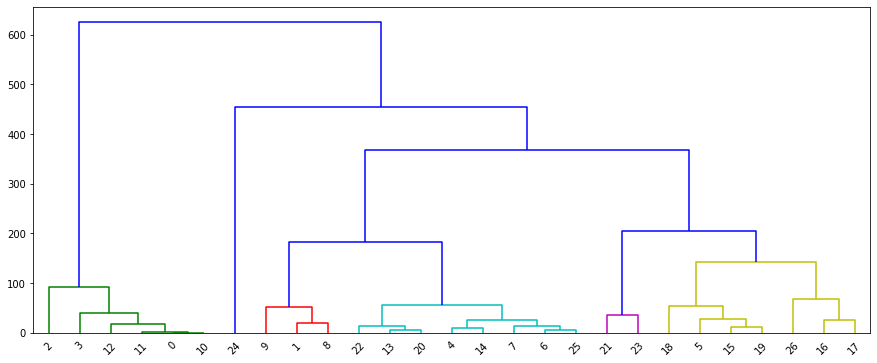

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward");

plt.figure(figsize = (15, 6))
# строим дендрограмму

threshold = 151
dend = dendrogram(Z, 
                  p=10,
                  truncate_mode='level',
                  color_threshold=threshold, 
                  above_threshold_color='b',
                  leaf_rotation=45);

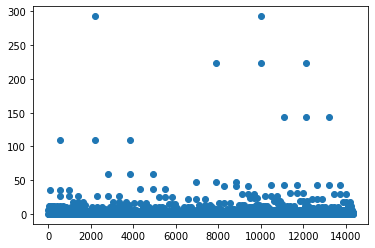

In [ ]:
import matplotlib

# plt.scatter(dend['icoord'][-500:], dend['dcoord'][-500:]);
plt.scatter(dend['icoord'][:], dend['dcoord'][:], marker='o' );

#### Задание 7.7.5

Сколько кластеров получится, если граничным расстоянием для разделения кластеров взять 100?



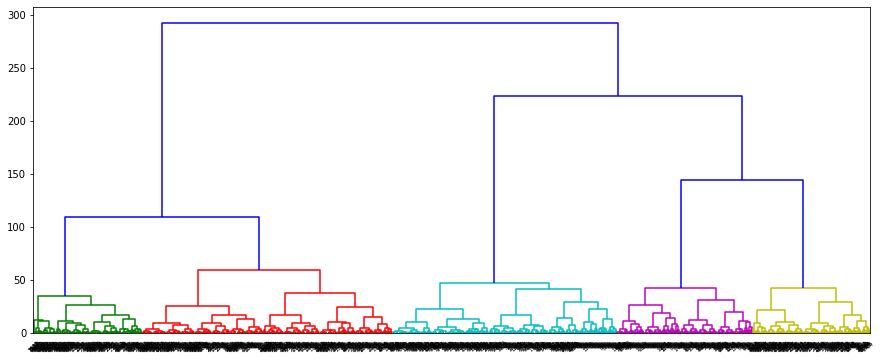

In [ ]:
plt.figure(figsize = (15, 6))
# строим дендрограмму

threshold_2 = 100
dend_2 = dendrogram(Z, 
                  p=10,
                  truncate_mode='level',
                  color_threshold=threshold_2, 
                  above_threshold_color='b',
                  leaf_rotation=45);

#### Задание 7.7.6
Рассмотрим [данные](https://lms.skillfactory.ru/assets/courseware/v1/674de4a149becd117e895dc5bf1e36f4/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/food.txt), содержащие информацию о составе различных продуктов.

Попробуем построить на них иерархическую кластеризацию:

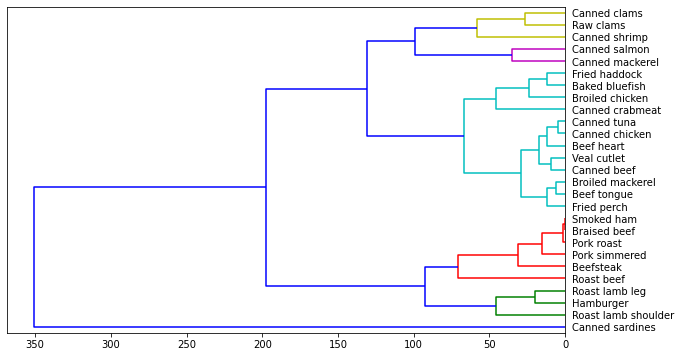

In [ ]:
import pandas as pd
import pandas as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

path = 'https://lms.skillfactory.ru/assets/courseware/v1/674de4a149becd117e895dc5bf1e36f4/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/food.txt'
df = pd.read_csv(path, sep=' ')

X = df.drop(['Name'], axis=1).values
y = df['Name'].values

stdscaler = StandardScaler()
stdscaler.fit_transform(X)

Z = linkage(X, method='average', metric='euclidean')
names = df['Name'].values

plt.figure(figsize = (10, 6))

t = 85
dend = dendrogram(Z, color_threshold=t, labels=names, 
                  orientation='left')

# t = 2.3 ????
labels = fcluster(Z, t, criterion='distance')

Сколько всего кластеров получилось для продуктов?

In [ ]:
len(np.unique(labels))

6

Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [ ]:
# display(df[(df.loc[:, 'Calcium'] >= 150) & (df.loc[:, 'Calcium'] <= 160)])
calcium_ind = np.array(df[(df.loc[:, 'Calcium'] >= 150) &
                          (df.loc[:, 'Calcium'] <= 160)].index)
labels[calcium_ind][:]

array([4, 4], dtype=int32)

In [ ]:
df['cluster'] = labels
df.loc[calcium_ind, :]['cluster'].values

array([4, 4], dtype=int32)

Введите номер кластера, в который попал продукт с максимальной жирностью.

In [ ]:
max_fat_ind = df[df.loc[:, 'Fat'] == df.loc[:, 'Fat'].max()].index
labels[max_fat_ind][0]

2

### 7.8. DBSCAN. Практика

#### Попытка воссоздать DBSCAN

In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(formatter={'float': "{0:0.3f}".format})
pd.options.display.float_format = '{:,.3f}'.format

def dist(x1, x2):
    x1 = x1.values[[type(el) != str for el in x1]]
    x2 = x2.values[[type(el) != str for el in x2]]
    return round((np.sum((x2-x1)**2))**0.5, 3)

# df = pd.DataFrame({'a': [0, 1.0, 2.5, 5], 'b': [2, 3, 1, 5],
#                    'c': ['s', 'd', 'd', 'e'], 'r': [1, 10, 4, 2]})
N = df.shape[0]
dist_matrix = ([
               ([dist(df.iloc[i, :], df.iloc[j, :]) for i in range(j + 1)])
                for j in range(N)
])

for i in range(N):
    for j in range(N):
        if j > i: dist_matrix[i] += [dist_matrix[j][i]]

dist_matrix = np.array(dist_matrix)
# dist_matrix

# points_unvisited = df.shape[0]

# for i in range(points_left):
#     df.iloc[0, 1:] = 

#### Преамбула

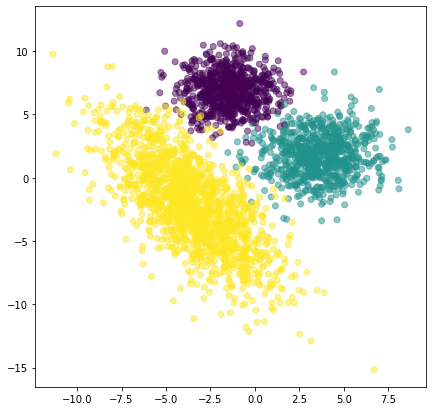

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# Визуализируем наш датасет:
plt.rcParams['figure.figsize'] = 7, 7
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

При использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.


Объект, который выполняет кластеризацию датасета с помощью алгоритма DBSCAN, инициализируется так:

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

В отличие от k-means и AgglomerativeClustering, класс DBSCAN не имеет параметра n_clusters, поскольку DBSCAN автоматически определяет число кластеров в выборке.

In [ ]:
# Обучение модели DBSCAN проходит аналогично обучению модели k-means:
# dbscan.fit(X)

# Обучив, мы можем узнать, в какой кластер попал каждый из объектов:
# dbscan.labels_

#### Задание 7.8.1

Какой параметр DBSCAN устанавливает число объектов в окрестности, которое определяет, является ли объект основным или нет? Ответ: `min_samples`

#### Задание 7.8.2
 
Обучите модель DBSCAN с параметрами `eps=0.9` и `min_samples=35` на признаках объектов исходного датасета. Выведите число получившихся кластеров.

Обратите внимание, что DBSCAN определяет выбросы, относя их к кластеру -1. Кластер выбросов учитывать в ответе не нужно.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

X = StandardScaler().fit_transform(X)
outliers = []

# ищем, какие параметры DBSCAN дают нужный ответ
for i, eps in enumerate(np.linspace(0.15, 0.25, 20)):
    outliers += [[]]
    for ms in np.linspace(20, 30, 10):
        dbs = DBSCAN(eps=eps, min_samples=round(ms))
        dbs.fit(X)
        y_pred = dbs.labels_.astype(int)
        outliers[i] += [np.sum(y_pred==-1)]

outliers_df = pd.DataFrame(outliers, index=np.linspace(0.15, 0.25, 20), 
                           columns=np.round(np.linspace(20, 30, 10)))

pos = outliers_df[outliers_df == 368].dropna(axis=1, how='all').dropna(how='all')
indices = pos.stack().index.tolist()
indices

[(0.2026315789473684, 26.0)]

In [ ]:
dbs_ = DBSCAN(eps=0.2026, min_samples=26)
dbs_.fit(X)
y_pred = dbs_.labels_.astype(int)

In [ ]:
classes, counts = np.unique(y_pred, return_counts=True)
ls = list(dict(zip(classes, counts)).keys())
outliers = np.sum(y_pred==-1)
ls.remove(-1)
print (f' Количество кластеров: {len(ls)}\n Выбросов: {outliers}')

 Количество кластеров: 3
 Выбросов: 368


In [ ]:
# import seaborn as sn
# plt.rcParams['figure.figsize'] = 40, 40

# sn.heatmap(outliers, cmap='coolwarm', annot=True, fmt='g');

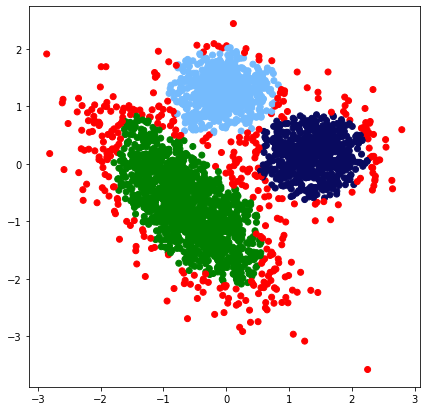

In [ ]:
col_dict = {-1: 'r', 0: '#090a5f', 1: 'xkcd:sky blue', 2: 'g'}
col_vec = [col_dict[el] for el in y_pred]

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=col_vec);

#### Задание 7.8.3

Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

In [ ]:
dict(zip(classes, counts))[-1]

368

#### Задание 7.8.4

Проверьте, как настройка параметров влияет на результат работы DBSCAN. Обучите модель DBSCAN с параметрами `eps=0.8` и `min_samples=35` на признаках объектов исходного датасета.

Выведите число объектов выборки, которые были отмечены как выбросы.

In [ ]:
dbs_ = DBSCAN(eps=0.8, min_samples=35)
dbs_.fit(X)
y_pred = dbs_.labels_.astype(int)

print (f'Выбросов: {np.sum(y_pred == -1)}')

Выбросов: 2


### 7.11. Коэффициент силуэта. Практика

В задачах используется датасет из прошлого модуля:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Коэффициент силуэта можно посчитать при помощи реализации из библиотеки sklearn:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RND_SEED = 42

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=RND_SEED)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131209788437305

В качестве параметров в функции silhouette_score используются:

X — массив признаков объектов выборки или массив попарных расстояний между объектами;
Y — массив предсказанных кластеров для объектов выборки;
metric — метрика, используемая для вычисления расстояния между объектами, мы будем использовать euclidean (Евклидово расстояние), полный список названий метрик можно увидеть здесь.

Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) (англ.).
При решении заданий модуля стандартизация должна быть выключена.

#### Задание 7.11.1

Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

0.5

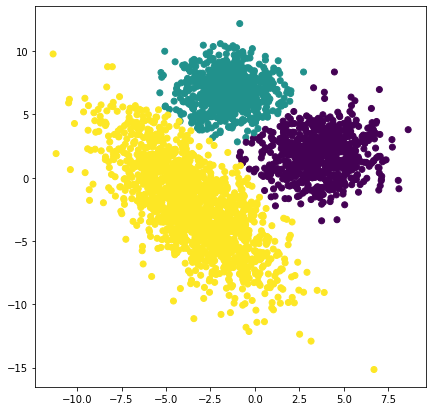

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
gm_clusters = gm.predict(X)

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=gm_clusters);

round(silhouette_score (X, gm_clusters), 1)

#### Задание 7.11.2

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

* `K-means` — `n_clusters=3`, 
`random_state=42`
* EM-алгоритм (`GaussianMixture`) — `n_components=3, random_state=42`
* Агломеративная кластеризация – `n_clusters=3`
*DBSCAN – `eps=0.9, min_samples=35`

Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

RND_SEED = 42

km = KMeans(n_clusters=3, random_state=RND_SEED)
km.fit(X)
km_clusters = km.labels_
silhouette_km = silhouette_score(X, km_clusters)

gm = GaussianMixture(n_components=3, random_state=RND_SEED)
gm.fit(X)
gm_clusters = gm.predict(X)
silhouette_gm = silhouette_score(X, gm_clusters)

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
agg_clusters = agg.labels_
silhouette_agg = silhouette_score(X, agg_clusters)

dbs = DBSCAN(eps=0.9, min_samples=35)
dbs.fit(X)
dbs_clusters = dbs.labels_
silhouette_dbs = silhouette_score(X, dbs_clusters)

print ('Коэффициент силуэта для:\n\n', 
       f'K-Means: {silhouette_km}\n GaussianMixture: {silhouette_gm}\n',
       f'Агломеративная кластеризация: {silhouette_agg}\n DBSCAN: {silhouette_dbs}')

print(f'\nНаибольший коэффициент силуэта: {np.round(max(silhouette_km, silhouette_gm, silhouette_agg, silhouette_dbs), 2)}')

Коэффициент силуэта для:

 K-Means: 0.5131209788437305
 GaussianMixture: 0.49893287606943293
 Агломеративная кластеризация: 0.4811992210663849
 DBSCAN: 0.4454335539277996

Наибольший коэффициент силуэта: 0.51


#### Задание 7.11.3

Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое **число кластеров**, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение `random_state=42`.

В качестве ответа через пробел введите **число кластеров**, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score as silh
import numpy as np

RND_SEED = 42

slht_dict = {'KMeans': {}, 'Gaussian Mixture': {}, 'Agglomerative': {}}

for num_clust in range(2, 11):
    kmeans = KMeans(n_clusters=num_clust, random_state=RND_SEED)
    gm = GaussianMixture(n_components=num_clust, random_state=RND_SEED)
    agg = AgglomerativeClustering(n_clusters=num_clust)
    kmeans.fit(X)
    gm.fit(X)
    agg.fit(X)
    
    slht_dict['KMeans'][num_clust] = silh(X, kmeans.labels_)
    slht_dict['Gaussian Mixture'][num_clust] = silh(X, gm.predict(X))
    slht_dict['Agglomerative'][num_clust] = silh(X, agg.labels_)

In [ ]:
import pandas as pd

df = pd.DataFrame(slht_dict)
df.index.name = 'num_of_clusters'
display(df)

for alg in ['KMeans', 'Gaussian Mixture', 'Agglomerative']:
    print(f'\n{alg}: кол-во кластеров - {df[df[alg] == df[alg].max()].index[0]},\n',
          f'коэфф. силуэта: {df[alg].max()}')



,KMeans,Gaussian Mixture,Agglomerative
num_of_clusters,,,
2,0.455311,0.455066,0.405604
3,0.513121,0.498933,0.481199
4,0.511491,0.510682,0.484707
5,0.481241,0.481377,0.473298
6,0.461716,0.462912,0.436055
7,0.397028,0.443456,0.361011
8,0.333350,0.327966,0.347028
9,0.329586,0.309698,0.278310
10,0.332522,0.305586,0.281315



KMeans: кол-во кластеров - 3,
 коэфф. силуэта: 0.5131209788437305

Gaussian Mixture: кол-во кластеров - 4,
 коэфф. силуэта: 0.510682306926087

Agglomerative: кол-во кластеров - 4,
 коэфф. силуэта: 0.48470679039805054


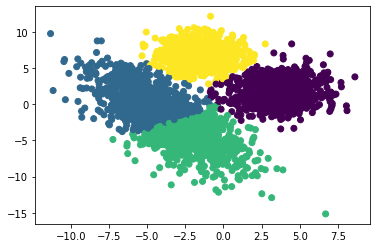

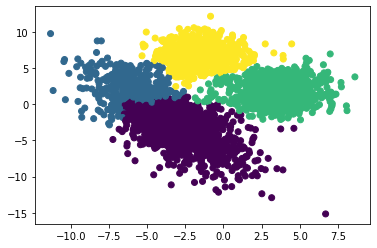

In [ ]:
import matplotlib.pyplot as plt

gm = GaussianMixture(n_components=4, random_state=RND_SEED)
gm.fit(X)
clusters = gm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters);
plt.show()

agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X)
clusters_ = agg.labels_

plt.scatter(X[:, 0], X[:, 1], c=clusters_);

###7.12. Однородность. Практика
Однородность можно посчитать при помощи реализации из библиотеки sklearn:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler


# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X)
kmeans_pred = kmeans.labels_ 

# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) (англ.).

####Задание 7.12.1

Сравните результаты кластеризации алгоритмов `k-means`, `GaussianMixture`, `AgglomerativeClustering` и `DBSCAN` на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

* `k-means — n_clusters=3, random_state=42`
* `GaussianMixture — n_components=3, random_state=42`
* `AgglomerativeClustering — n_clusters=3`
* `DBSCAN — eps=0.9, min_samples=35`
<br>

В качестве ответа укажите **максимальное значение однородности**, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

При решении задания модуля стандартизация должна быть включена.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)

#датасет для задачи
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42

X = StandardScaler().fit_transform(X)

algorythms = [KMeans(n_clusters=3, random_state=RANDOM_SEED),
              GaussianMixture(n_components=3, random_state=RANDOM_SEED),
              AgglomerativeClustering(n_clusters=3),
              DBSCAN(eps=0.9, min_samples=35)]

homogeneity = {}

for algorythm in algorythms:

    algorythm.fit(X)
    if not isinstance(algorythm, GaussianMixture):
        y_pred = algorythm.labels_
    else:
        y_pred = algorythm.predict(X)

    homogeneity[algorythm] = homogeneity_score(y, y_pred)

print (f'Максимальная однородность: {np.round(np.max(list(homogeneity.values())), 2)}')

Максимальная однородность: 0.93


###7.13. Полнота. Практика

Полноту можно посчитать при помощи реализации из библиотеки sklearn:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7808712092278982


Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html) (англ.).

#### Задание 7.13.1

Обучите модель `GaussianMixture` с параметрами `n_components=3 и random_state=42` на признаках исходного датасета. Посчитайте полноту для получившейся кластеризации. Ответ округлите до сотых и запишите с точкой. Не забудьте о стандартизации, она должна быть включена.

In [ ]:
from sklearn.metrics.cluster import completeness_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42

X = StandardScaler().fit_transform(X)

gm = GaussianMixture(n_components=3, random_state=RANDOM_SEED)
gm.fit(X)

print('Полнота кластеризации:',
      np.round(completeness_score(labels_true=y, labels_pred=gm.predict(X)), 2))

Полнота кластеризации: 0.93


####Задание 7.13.2

Сравните результаты кластеризации алгоритмов `k-means, GaussianMixture, AgglomerativeClustering и DBSCAN` на исходном датасете при помощи полноты, инициализируйте алгоритмы со следующими параметрами:

* k-means — `n_clusters=3, random_state=42`
* GaussianMixture — `n_components=3, random_state=42`
* AgglomerativeClustering — `n_clusters=3`
* DBSCAN — `eps=0.9, min_samples=35`
<br>

В качестве ответа укажите максимальное значение полноты, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import completeness_score
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42

X = StandardScaler().fit_transform(X)

algorythms = [KMeans(n_clusters=3, random_state=RANDOM_SEED),
              GaussianMixture(n_components=3, random_state=RANDOM_SEED),
              AgglomerativeClustering(n_clusters=3),
              DBSCAN(eps=0.9, min_samples=35)]

completeness = {}

for algorythm in algorythms:

    algorythm.fit(X)
    y_pred = algorythm.predict(X) if isinstance(algorythm, GaussianMixture) else algorythm.labels_
        

    completeness[algorythm] = completeness_score(y, y_pred)
print (f'Максимальная полнота: {np.round(np.max(list(completeness.values())), 2)}')
# completeness

Максимальная полнота: 0.93


###7.14. V-мера. Практика

V-меру можно посчитать при помощи реализации из библиотеки sklearn:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем V-меру
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) (англ.).

#### Задание 7.14.1

Обучите **модель `GaussianMixture`** с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета. Посчитайте **v-меру** для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42

X = StandardScaler().fit_transform(X)

gm = GaussianMixture(n_components=3, random_state=RANDOM_SEED)
gm.fit(X)

print('V-мера кластеризации:',
      np.round(v_measure_score(labels_true=y, labels_pred=gm.predict(X)), 2))

V-мера кластеризации: 0.93


####Задание 7.14.2

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи v-меры, инициализируйте алгоритмы со следующими параметрами:

* k-means — `n_clusters=3, random_state=42`
* GaussianMixture — `n_components=3, random_state=42`
* AgglomerativeClustering — `n_clusters=3`
* DBSCAN — `eps=0.9, min_samples=35`
<br>

В качестве ответа укажите **максимальное значение v-меры**, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42

X = StandardScaler().fit_transform(X)

algorythms = [KMeans(n_clusters=3, random_state=RANDOM_SEED),
              GaussianMixture(n_components=3, random_state=RANDOM_SEED),
              AgglomerativeClustering(n_clusters=3),
              DBSCAN(eps=0.9, min_samples=35)]

v_measure = {}

for algorythm in algorythms:

    algorythm.fit(X)
    y_pred = algorythm.predict(X) if isinstance(algorythm, GaussianMixture) else algorythm.labels_
        
    v_measure[algorythm] = v_measure_score(y, y_pred)

print (f'Максимальная v-мера: {np.round(np.max(list(v_measure.values())), 2)}')
# completeness

Максимальная v-мера: 0.93


#### Задание 7.14.3

Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.

Для этого обучим на исходном датасете 2 модели k-means со следующими параметрами:

* `n_clusters=3, init='k-means++', n_init=1, random_state=42`
* `n_clusters=3, init='random', n_init=1, random_state=42`

В качестве ответа укажите **максимальное значение v-меры**, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [ ]:
import numpy as np
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)

#датасет для задачи
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler

RND_SEED = 42
X = StandardScaler().fit_transform(X)

inits = ['k-means++', 'random']
v_measures = {}

for init in inits:
    kmeans = KMeans(n_clusters=3, init=init,
                    n_init=1, random_state=RND_SEED)
    kmeans.fit(X)
    v_measures[init] = v_measure_score(labels_true=y,
                                       labels_pred=kmeans.labels_)
    
print (f'Максимальная v-мера: {np.round(np.max(list(v_measures.values())), 2)}')

Максимальная v-мера: 0.79


####Задание 7.14.4

Теперь сравним `k-means` с ещё одной модификацией — `K-means` mini batch. Воспользоваться реализацией `K-means` mini batch в библиотеке `sklearn` можно следующим образом:

In [ ]:
from sklearn.cluster import MiniBatchKMeans

RND_SEED = 42

kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=RND_SEED)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_

Механизм кластеризации версии K-means mini batch схож с оригинальной версией алгоритма. Обучите на исходном датасете две модели:

`k-means` с параметрами `n_clusters=3, n_init=1, random_state=42`
`MiniBatchKMeans` с параметрами `n_clusters=3, n_init=1, random_state=42`
В качестве ответа введите **максимальное значение v-меры**, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)

#датасет для задачи
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

v_measures = []
algorythms = [KMeans, MiniBatchKMeans]
for iter in range(2):
    X_ = X if not iter else StandardScaler().fit_transform(X)

    for alg in algorythms:
        alg_with_params = alg(n_clusters=3, n_init=1, random_state=42)
        alg_with_params.fit(X_)
        v_measures += [v_measure_score(labels_true=y,
                                       labels_pred=alg_with_params.labels_)]

print (f'Максимальная v-мера: {np.round(np.max(v_measures), 1)}')

Максимальная v-мера: 0.8


####Задание 7.14.5

Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.

Обучите на исходном датасете четыре модели `AgglomerativeClustering` с параметром `n_clusters=3`, меняя параметр `linkage`.

В качестве ответа укажите **максимальное значение v-меры**, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler
import numpy as np

linkages = ['ward', 'complete', 'average', 'single']
std_switches = ['STD ON', 'STD OFF']
vm = {}

for std_switch in std_switches:
    
    X_ = X if std_switch =='STD OFF' else StandardScaler().fit_transform(X)
    vm[std_switch] = {}
    for l in linkages:
        agg = AgglomerativeClustering(n_clusters=3, linkage=l)
        agg.fit(X_)
        vm[std_switch][l] = v_measure_score(labels_true=y,
                                            labels_pred=agg.labels_)
        
ls = list(list(vm.values())[0].values()) + list(list(vm.values())[1].values())
print (f'Максимальная v-мера: {np.round(np.max(ls), 2)}')     

Максимальная v-мера: 0.91


####Задание 7.14.6

Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.

Обучите на исходном датасете две модели AgglomerativeClustering:

* с параметром `n_clusters=3`
* с параметром `n_clusters=3` и предварительно посчитанной матрицей смежности для объектов датасета

Построить матрицу смежности можно с помощью кода:

In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

В качестве ответа введите **максимальное значение v-меры**, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

aggs = [(AgglomerativeClustering(n_clusters=3), ''),
        (AgglomerativeClustering(n_clusters=3, connectivity=connectivity), ' + connectivity')]

std_switches = ['STD ON', 'STD OFF']
vm = {}

for std_switch in std_switches:
    X_ = X if std_switch == 'STD OFF' else StandardScaler().fit_transform(X)
    for agg in aggs:
        agg[0].fit(X_)
        vm[std_switch + agg[1]] = v_measure_score(labels_true=y,
                                                  labels_pred=agg[0].labels_)
        
print (f'Максимальная v-мера: {np.round(np.max(list(vm.values())), 2)}')
# vm

Максимальная v-мера: 0.91


{'STD OFF': 0.703747024360433,
 'STD OFF + connectivity': 0.902634398342219,
 'STD ON': 0.9079037199053294,
 'STD ON + connectivity': 0.883942992495597}

####Задание 7.14.7

Алгоритм DBSCAN очень требователен к параметрам: небольшое изменение в параметре `eps` или `min_samples` может изменить результат и качество кластеризации.

Обучите на исходном датасете две модели DBSCAN:

* с параметрами `eps=0.9, min_samples=35`
* с параметрами `eps=0.8, min_samples=35`

В качестве ответа укажите **максимальное значение v-меры**, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score
import numpy as np

eps_ls = [0.9, 0.8]

std_switches = ['STD ON', 'STD OFF']
vm = {}

for std_switch in std_switches:
    X_ = X if std_switch == 'STD OFF' else StandardScaler().fit_transform(X)
    for eps in eps_ls:
        dbs = DBSCAN(eps=eps, min_samples=35)
        dbs.fit(X_)
        vm[std_switch + f' + eps={eps}'] = v_measure_score(labels_true=y,
                                                  labels_pred=dbs.labels_)
                
print (f'Максимальная v-мера: {np.round(np.max(list(vm.values())), 2)}')
# vm 

Максимальная v-мера: 0.77


{'STD OFF + eps=0.8': 0.7063100442576922,
 'STD OFF + eps=0.9': 0.7732549110297919,
 'STD ON + eps=0.8': 0.000884601531943088,
 'STD ON + eps=0.9': 0.000884601531943088}

####Задание 7.14.8

Особенностью алгоритма `DBSCAN` является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке. Посмотрим на качество кластеризации без учёта таких объектов.

Обучите на исходном датасете модель DBSCAN с параметрами `eps=0.9, min_samples=35`. Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

# X_ = StandardScaler().fit_transform(X)

dbs = DBSCAN(eps=0.9, min_samples=35)
dbs.fit(X)
lbls = dbs.labels_

y_true = y[lbls != -1]
y_pred = lbls[lbls != -1]

np.round(v_measure_score(labels_true=y_true, labels_pred=y_pred), 2)

0.97

####Задание 7.14.9

В курсе мы рассмотрели две метода нормализации данных:

* MinMax нормализация — приведение данных к масштабу между 0 и 1.
* Стандартная нормализация — данные имеют среднее 0 и стандартное отклонение 1.

Проверим, влияет ли предобработка данных на результат кластеризации. Обучите две **модели AgglomerativeClustering** с параметрами `n_clusters=3`:

* на признаках исходного датасета,
* предварительно трансформируйте признаки при помощи стандартной нормализации.

Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

std_switches = ['STD ON', 'STD OFF']
vm = {}

for std_switch in std_switches:
    X_ = X if std_switch == 'STD OFF' else StandardScaler().fit_transform(X)
    agg = AgglomerativeClustering(n_clusters=3)
    agg.fit(X_)
    vm[std_switch] = v_measure_score(labels_true=y, labels_pred=agg.labels_)
                
print (f'Максимальная v-мера: {np.round(np.max(list(vm.values())), 2)}')
vm 

Максимальная v-мера: 0.91


{'STD OFF': 0.703747024360433, 'STD ON': 0.9079037199053294}

#### Задание 7.14.10

Обучите две модели `AgglomerativeClustering` с параметрами `n_clusters=3`:

* на признаках исходного датасета,
* предварительно трансформируйте признаки при помощи MinMax нормализации.

Посчитайте **v-меру** для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import v_measure_score

std_switches = ['MinMax ON', 'MinMax OFF']
vm = {}

for std_switch in std_switches:
    X_ = X if std_switch == 'MinMax OFF' else MinMaxScaler().fit_transform(X)
    agg = AgglomerativeClustering(n_clusters=3)
    agg.fit(X_)
    vm[std_switch] = v_measure_score(labels_true=y, labels_pred=agg.labels_)
                
print (f'Максимальная v-мера: {np.round(np.max(list(vm.values())), 2)}')
vm 

Максимальная v-мера: 0.89


{'MinMax OFF': 0.703747024360433, 'MinMax ON': 0.8929241488344335}

### 7.15. Кластеризация текстов
Рассмотрим пример кластеризации текстов на стандартном наборе данных, новостях, выберем в наборе 4 из 20 категорий.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# Выбираем 4 категории новостей для легковесности примера
categories = [
    'rec.sport.hockey', # хоккей
    'talk.politics.mideast', # политические новости о Ближнем Востоке
    'comp.graphics', # компьютерная графика
    'sci.crypt' # криптография
]

# Скачиваем набор данных
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d документов" % len(dataset.data))
print("%d категории" % len(dataset.target_names))

# Записываем значения категорий для каждой новости
labels = dataset.target

3903 документов
4 категории


Тексты новостей нужно преобразовать в числа и почистить от посторонних символов. Для этого воспользуемся инструментом из библиотеки sklearn, он построит токенизированные данные.


---


Примечание: Токенизация — это разделение текста на компоненты. Например, 
токенизация по предложениям — это процесс разделения письменного языка на предложения-компоненты. А токенизация по словам — это разделение предложений на слова-компоненты.

In [ ]:
# Создаём объект, который будет токенизировать данные
analyzer = CountVectorizer(stop_words='english').build_analyzer()

# Токенизируем набор данных
docs = []
for document in dataset.data:
    docs.append(analyzer(document.replace('_', '')))

Каждый текст превратился в отдельный набор слов. Перейдём к векторизации текстов: воспользуемся моделью Word2Vec, которая для каждого слова строит числовой вектор, в нашем случае каждое слово будет кодироваться 50 числами. При этом вектора будем делать для тех слов, которые встречаются больше 20 раз во всех текстах документов. Также сделаем средний вектор для всех слов, таким образом получим вектор для текста в целом.

---

**Примечание**: более подробно с моделью *Word2vec* можно познакомиться в этой [статье](habr.com/ru/post/446530/).


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Word2Vec

# Обучаем модель векторайзера на нашем наборе данных
# На выходе мы получим вектор признаков для каждого слова
model = Word2Vec(docs, min_count=20, size=50)

# Наивный подход к созданию единого эмбеддинга для документа – средний эмбеддинг по словам
def doc_vectorizer(doc, model):
    doc_vector = []
    num_words = 0
    for word in doc:
        try:
            if num_words == 0:
                doc_vector = model[word]
            else:
                doc_vector = np.add(doc_vector, model[word])
            num_words += 1
        except:
            pass
     
    return np.asarray(doc_vector) / num_words

# Составляем эмбеддинги для наших документов
X = []
for doc in docs:
    X.append(doc_vectorizer(doc, model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


Наша кластеризация будет работать лучше, если снизить **размерность**. Для этого воспользуемся методом *TSNE*.


---


Примечание: TSNE — это техника нелинейного снижения размерности и визуализации многомерных признаков, почитать о ней можно, например, [здесь](https://https://habr.com/ru/post/267041/).


---


При понижении размерности мы сохраняем близость элементов, то есть если элементы были близки при size=50, то они останутся близки и при size=2.

In [ ]:
# t-SNE – метод понижения размерности
from sklearn.manifold import TSNE

# Создаём объект для выполнения t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Преобразуем наши данные, понизив размерность с 50 до 2
X = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Создадим кластеризатор **KMeans** и обучим на подготовленных данных. Мы можем посмотреть получившиеся центроиды и предсказанные кластеры.

In [ ]:
# Создаём KMeans кластеризатор 
kmeans = KMeans(n_clusters=4)

# Обучаем кластеризатор на подготовленных данных
kmeans.fit(X)

# Получаем предсказанные кластеры
y_pred = kmeans.labels_.astype(np.int)

# Координаты полученных центроидов
print ("Координаты центроидов:\n", kmeans.cluster_centers_)

Какие у нас **метрики**? Коэффициент силуэта, однородность, полнота и V-мера говорят о том, что кластеры довольно цельные, высокие совпадения между истинными значениями и теми, что мы получили.

### PYTHON-15. Тестирование и отладка кода

####Задание 2

Определите функцию check_server, которая принимает на вход переменную mode.

* Если mode имеет значение "memory", программа должна вернуть строку "Memory is ok".
* Если mode имеет значение "connection", программа должна вернуть строку "Connection is ok".
* Для остальных случае программа должна выбросить исключение ValueError.

In [ ]:
def check_server(mode=None):
    if mode == 'memory':
        return 'Memory is ok'
    elif mode == 'connection':
        return 'Connection is ok'
    else:
        raise ValueError()

check_server('smthelse')

ValueError: ignored

#### Задание 2

Напишите программу, которая реализует безопасное сложение двух объектов x и y.

Если объекты не могут быть сложены, функция должна:

* Отловить TypeError
* Вывести на экран "Can't sum x and y", где x и y - переданные объекты
* Вернуть 0



```
safe_sum(1, 2)
# 3

safe_sum(5, 'a')
# => Can't sum 5 and a
# 0
```



In [ ]:
def safe_sum(x, y):
    try:
        return x + y
    except TypeError:
        print("Can't sum x and y")
        return 0

Для примеров в этом разделе мы будем использовать [датасет](https://lms.skillfactory.ru/assets/courseware/v1/afb771041483f365e873e8625d02f792/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/imdb.csv) о фильмах с imdb.

#### Задание

В каком году вышел фильм Suicide Squad, информация о котором есть в датасете imdb?

In [1]:
import pandas as pd

path = 'https://lms.skillfactory.ru/assets/courseware/v1/afb771041483f365e873e8625d02f792/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/imdb.csv'
df = pd.read_csv(path)
df.sample(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
148,168,Woman in Gold,"Biography,Drama,History","Maria Altmann, an octogenarian Jewish refugee,...",Simon Curtis,"Helen Mirren, Ryan Reynolds, Daniel Brühl, Kat...",2015,109,7.3,39723,33.31,51.0


In [2]:
df[df.Title=='Suicide Squad'].Year.values[0]

2016

#### Задание 2

У вас есть функция, которая должна убирать дубликаты из списка и сохранять при этом порядок:

```
remove_dups([1, 12, 4, 1, 4, 8])
# => [1, 12, 4, 8]
```
Сейчас она не очень хорошо написана и возвращает исключение: исправьте её



```
from copy import copy

def remove_dups(values):
    values = copy(values)
    for i in range(len(values)):
        if values[i+1] in values[i:]:
            values.remove(values[i])
    return values
```



In [50]:
from copy import copy

def remove_dups(values):
    values = copy(values)
    for i in range(len(values)):
        try:
            if values[i] in values[i - 1:]:
                values.remove(values[i])
        except:
            pass
    return values

remove_dups([1, 12, 4, 1, 4, 8])

[4, 1, 4]

In [32]:
a = [1, 12, 4, 1, 4, 8]
m = [0,1,0,0]
10 not in a

True